# Exploratory Data Analysis (EDA) of MTA Turnstile Data

In [1]:
# Topic:        Project 1
# Subject:      Exploratory Data Analysis (EDA) of MTA turnstile data
# Date:         09/06/2020
# Name:         yalin yener

In [2]:
# Importing Libraries

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [3]:
# Reading Multiple txt Files and Creating Data Frame

path = '/Users/yalinyener/GitHub/yalinyener/EDA-MTA-Turnstile/data/2019_01_05' # get path for all files that used by EDA

all_files = glob.glob(path + "/*.txt")

# create empty list and append all files

file_list = []

for filename in all_files:
    df = pd.read_csv(filename)
    file_list.append(df)

# Concatenate all data into one DataFrame that called "mta"
  
mta = pd.concat(file_list)              

In [4]:
#Checking DataFrame's first 10 rows

mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,23:00:00,REGULAR,6915525,2345049
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,03:00:00,REGULAR,6915559,2345064
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,07:00:00,REGULAR,6915565,2345072
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,11:00:00,REGULAR,6915628,2345125
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,15:00:00,REGULAR,6915778,2345178


In [5]:
#Checking DataFrame size

mta.shape

(4480606, 11)

In [6]:
#Checking general info about dataframe

mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480606 entries, 0 to 203188
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [7]:
# Checking columns names

mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [8]:
# Eliminate spaces at columns names

mta.columns = mta.columns.str.strip()
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
#Checking duplicates rows and drop.

mta.drop_duplicates(subset=None, keep="first", inplace=True)

In [10]:
#Checking null values based on columns

mta.isnull().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [11]:
#Checking basic descriptive statistics for numerical columns.

mta.describe()

,ENTRIES,EXITS
count,4.480606e+06,4.480606e+06
mean,4.088585e+07,3.365294e+07
std,2.097226e+08,1.941850e+08
min,0.000000e+00,0.000000e+00
25%,3.937772e+05,1.663580e+05
50%,2.296828e+06,1.318136e+06
75%,6.822866e+06,4.712473e+06
max,2.129552e+09,2.124342e+09


In [12]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'

mta["TURNSTILE"] = mta["C/A"]+"-"+mta["UNIT"]+"-"+mta["SCP"]

mta.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026,A002-R051-02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,23:00:00,REGULAR,6915525,2345049,A002-R051-02-00-00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,03:00:00,REGULAR,6915559,2345064,A002-R051-02-00-00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,07:00:00,REGULAR,6915565,2345072,A002-R051-02-00-00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,11:00:00,REGULAR,6915628,2345125,A002-R051-02-00-00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/20/2019,15:00:00,REGULAR,6915778,2345178,A002-R051-02-00-00


In [13]:
# Creating DATETIME as datetime64 column that concatenate "DATE" and "TIME"

mta['DATETIME'] = mta["DATE"]+ " " + mta["TIME"]

mta['DATETIME'] = pd.to_datetime(mta['DATETIME'], format='%m/%d/%Y %H:%M:%S')

mta.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480606 entries, 0 to 203188
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  TURNSTILE  object        
 12  DATETIME   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 478.6+ MB


In [14]:
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,03:00:00,REGULAR,6914752,2344809,A002-R051-02-00-00,2019-01-19 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,07:00:00,REGULAR,6914764,2344821,A002-R051-02-00-00,2019-01-19 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,11:00:00,REGULAR,6914825,2344898,A002-R051-02-00-00,2019-01-19 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,15:00:00,REGULAR,6915047,2344971,A002-R051-02-00-00,2019-01-19 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/19/2019,19:00:00,REGULAR,6915367,2345026,A002-R051-02-00-00,2019-01-19 19:00:00


In [15]:
#Create a column that called "NAMEOFDAY"
mta["NAMEOFDAY"]= mta["DATETIME"].dt.day_name()

#Checking sample 5 rows
mta.sample(5)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,NAMEOFDAY
90590,N400A,R359,02-00-00,COURT SQ,EMG,IND,03/06/2019,19:00:00,REGULAR,556366,2551984,N400A-R359-02-00-00,2019-03-06 19:00:00,Wednesday
134820,R138,R293,00-03-00,34 ST-PENN STA,123ACE,IRT,03/21/2019,22:00:00,REGULAR,98306969,1155294101,R138-R293-00-03-00,2019-03-21 22:00:00,Thursday
1716,A013,R081,01-03-00,49 ST,NQRW,BMT,05/08/2019,12:00:00,REGULAR,4829876,5427153,A013-R081-01-03-00,2019-05-08 12:00:00,Wednesday
194413,R608,R056,00-00-00,NEVINS ST,2345,IRT,02/15/2019,23:00:00,REGULAR,996021,1718616,R608-R056-00-00-00,2019-02-15 23:00:00,Friday
126432,R106,R305,01-00-01,WTC-CORTLANDT,1,IRT,12/29/2018,12:00:00,REGULAR,122,881,R106-R305-01-00-01,2018-12-29 12:00:00,Saturday


In [16]:
# Working with only neccessary columns

mta = mta[["STATION","TURNSTILE","DATE","TIME","DATETIME","NAMEOFDAY","ENTRIES","EXITS"]]
mta.head(10)

,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00,01/19/2019,03:00:00,2019-01-19 03:00:00,Saturday,6914752,2344809
1,59 ST,A002-R051-02-00-00,01/19/2019,07:00:00,2019-01-19 07:00:00,Saturday,6914764,2344821
2,59 ST,A002-R051-02-00-00,01/19/2019,11:00:00,2019-01-19 11:00:00,Saturday,6914825,2344898
3,59 ST,A002-R051-02-00-00,01/19/2019,15:00:00,2019-01-19 15:00:00,Saturday,6915047,2344971
4,59 ST,A002-R051-02-00-00,01/19/2019,19:00:00,2019-01-19 19:00:00,Saturday,6915367,2345026
5,59 ST,A002-R051-02-00-00,01/19/2019,23:00:00,2019-01-19 23:00:00,Saturday,6915525,2345049
6,59 ST,A002-R051-02-00-00,01/20/2019,03:00:00,2019-01-20 03:00:00,Sunday,6915559,2345064
7,59 ST,A002-R051-02-00-00,01/20/2019,07:00:00,2019-01-20 07:00:00,Sunday,6915565,2345072
8,59 ST,A002-R051-02-00-00,01/20/2019,11:00:00,2019-01-20 11:00:00,Sunday,6915628,2345125
9,59 ST,A002-R051-02-00-00,01/20/2019,15:00:00,2019-01-20 15:00:00,Sunday,6915778,2345178


In [17]:
#Finding maximum and minimum date in dataframe

print("Maximum date: ")
print(mta["DATETIME"].max())
print()
print("Minimum date: ")
print(mta["DATETIME"].min())

Maximum date: 
2019-05-31 23:59:57

Minimum date: 
2018-12-29 00:00:00


In [18]:
#Working with these dates beetween 01.01.2019 and 31.05.2019

mta = mta[mta["DATETIME"]>="2019"]
mta.shape

(4394408, 8)

In [19]:
#Controlling maximum and minimum date in dataframe

print("Maximum date: ")
print(mta["DATETIME"].max())
print()
print("Minimum date: ")
print(mta["DATETIME"].min())

Maximum date: 
2019-05-31 23:59:57

Minimum date: 
2019-01-01 00:00:00


In [20]:
#Checking unique Station values and number of Station

print(mta["STATION"].unique())

len(mta["STATION"].unique())

['59 ST' '5 AV/59 ST' '57 ST-7 AV' '49 ST' 'TIMES SQ-42 ST'
 '34 ST-HERALD SQ' '28 ST' '23 ST' '14 ST-UNION SQ' '8 ST-NYU' 'PRINCE ST'
 'CANAL ST' 'CITY HALL' 'CORTLANDT ST' 'RECTOR ST' 'WHITEHALL S-FRY'
 'DELANCEY/ESSEX' 'BOWERY' 'CHAMBERS ST' 'FULTON ST' 'BROAD ST' '7 AV'
 'PARK PLACE' 'BOTANIC GARDEN' 'PROSPECT PARK' 'PARKSIDE AV' 'CHURCH AV'
 'BEVERLEY ROAD' 'CORTELYOU RD' 'NEWKIRK PLAZA' 'AVENUE H' 'AVENUE J'
 'AVENUE M' 'KINGS HWY' 'AVENUE U' 'NECK RD' 'SHEEPSHEAD BAY'
 'BRIGHTON BEACH' 'OCEAN PKWY' 'BOROUGH HALL' 'JAY ST-METROTEC'
 'DEKALB AV' 'ATL AV-BARCLAY' 'UNION ST' '4AV-9 ST' 'PROSPECT AV' '25 ST'
 '36 ST' '45 ST' '53 ST' 'BAY RIDGE AV' '77 ST' '86 ST' 'BAY RIDGE-95 ST'
 '8 AV' 'FT HAMILTON PKY' 'NEW UTRECHT AV' '18 AV' '20 AV' 'BAY PKWY'
 '9 AV' '50 ST' '55 ST' '71 ST' '79 ST' '25 AV' 'BAY 50 ST'
 'CONEY IS-STILLW' 'W 8 ST-AQUARIUM' '6 AV' '3 AV' '1 AV' 'BEDFORD AV'
 'LORIMER ST' 'GRAHAM AV' 'GRAND ST' 'MONTROSE AV' 'MORGAN AV'
 'JEFFERSON ST' 'MYRTLE-WYCKOFF' 'HALSEY ST'

379

In [21]:
#Checking some columns value's counts

print("Row count based on stations (First 10 rows)")
print(mta["STATION"].value_counts().sort_values(ascending=False).head(10))

Row count based on stations (First 10 rows)
34 ST-PENN STA     91854
FULTON ST          87452
23 ST              65838
GRD CNTRL-42 ST    60944
86 ST              54543
CANAL ST           52935
34 ST-HERALD SQ    50303
CHAMBERS ST        49637
59 ST              47996
42 ST-PORT AUTH    47040
Name: STATION, dtype: int64


In [22]:
#Understanding data-1 (filtering one turnstile for only a month)
#This subset data (data-1) perform a good example 

mta_1 = mta[(mta["TURNSTILE"]=="A002-R051-02-00-00")&(mta["DATE"]>="03/01/2019")&(mta["DATE"]<="04/01/2019")]
mta_1

,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00,03/23/2019,00:00:00,2019-03-23 00:00:00,Saturday,6989774,2370411
1,59 ST,A002-R051-02-00-00,03/23/2019,04:00:00,2019-03-23 04:00:00,Saturday,6989795,2370413
2,59 ST,A002-R051-02-00-00,03/23/2019,08:00:00,2019-03-23 08:00:00,Saturday,6989813,2370436
3,59 ST,A002-R051-02-00-00,03/23/2019,12:00:00,2019-03-23 12:00:00,Saturday,6989924,2370512
4,59 ST,A002-R051-02-00-00,03/23/2019,16:00:00,2019-03-23 16:00:00,Saturday,6990200,2370573
...,...,...,...,...,...,...,...,...
37,59 ST,A002-R051-02-00-00,03/01/2019,07:00:00,2019-03-01 07:00:00,Friday,6962111,2361714
38,59 ST,A002-R051-02-00-00,03/01/2019,11:00:00,2019-03-01 11:00:00,Friday,6962243,2362017
39,59 ST,A002-R051-02-00-00,03/01/2019,15:00:00,2019-03-01 15:00:00,Friday,6962502,2362082
40,59 ST,A002-R051-02-00-00,03/01/2019,19:00:00,2019-03-01 19:00:00,Friday,6963303,2362149


In [23]:
#Understanding data-1 with basic statistics values

mta_1.describe()

,ENTRIES,EXITS
count,1.970000e+02,1.970000e+02
mean,6.981504e+06,2.367944e+06
std,1.170877e+04,3.713283e+03
min,6.962094e+06,2.361672e+06
25%,6.972010e+06,2.365118e+06
50%,6.981415e+06,2.367704e+06
75%,6.991446e+06,2.370866e+06
max,7.001895e+06,2.374553e+06


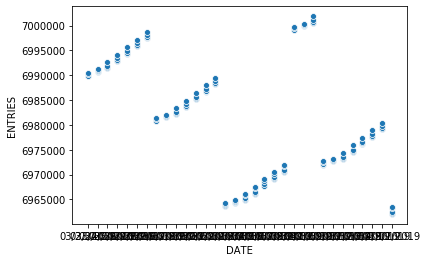

In [24]:
#Understanding data-1 with scatterplot

ax = sns.scatterplot(x="DATE", y="ENTRIES", data=mta_1)

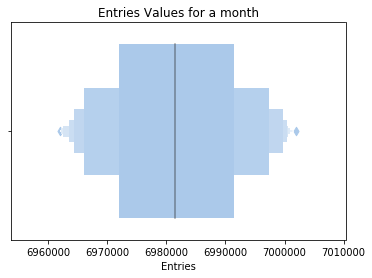

In [25]:
#Understanding data-1 with boxenplot

ax = sns.boxenplot(x='ENTRIES', data=mta_1,palette="pastel").set(xlabel='Entries',title="Entries Values for a month")


In [26]:
#Understanding data-2
#This subset data (data-1) perform a bad example (huge jump)

mta_2 = mta[(mta["TURNSTILE"]=="R252-R180-00-03-02")&(mta["DATE"]>="03/01/2019")&(mta["DATE"]<="04/01/2019")]
mta_2

,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS
164686,103 ST,R252-R180-00-03-02,03/23/2019,01:00:00,2019-03-23 01:00:00,Saturday,2097086759,1711189207
164687,103 ST,R252-R180-00-03-02,03/23/2019,05:00:00,2019-03-23 05:00:00,Saturday,2097086746,1711189119
164688,103 ST,R252-R180-00-03-02,03/23/2019,09:00:00,2019-03-23 09:00:00,Saturday,2097086648,1711188991
164689,103 ST,R252-R180-00-03-02,03/23/2019,13:00:00,2019-03-23 13:00:00,Saturday,2097086393,1711188734
164690,103 ST,R252-R180-00-03-02,03/23/2019,17:00:00,2019-03-23 17:00:00,Saturday,2097086117,1711188326
...,...,...,...,...,...,...,...,...
163829,103 ST,R252-R180-00-03-02,03/01/2019,04:00:00,2019-03-01 04:00:00,Friday,8560879,26864157
163830,103 ST,R252-R180-00-03-02,03/01/2019,08:00:00,2019-03-01 08:00:00,Friday,8561105,26864399
163831,103 ST,R252-R180-00-03-02,03/01/2019,12:00:00,2019-03-01 12:00:00,Friday,8561558,26864833
163832,103 ST,R252-R180-00-03-02,03/01/2019,16:00:00,2019-03-01 16:00:00,Friday,8562057,26865365


In [27]:
#Understanding data-2 with basic statistics values

mta_2.describe()

,ENTRIES,EXITS
count,1.970000e+02,1.970000e+02
mean,7.294800e+08,6.082669e+08
std,9.954612e+08,8.027978e+08
min,8.560857e+06,2.686409e+07
25%,8.572374e+06,2.688148e+07
50%,8.580069e+06,2.689884e+07
75%,2.097077e+09,1.711174e+09
max,2.097089e+09,1.711193e+09


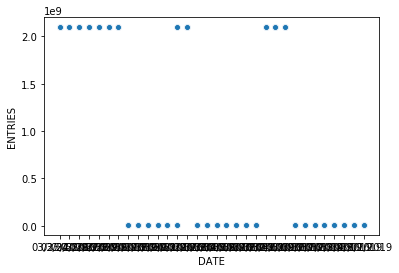

In [28]:
#Understanding data-2 with scatterplot

ax = sns.scatterplot(x="DATE", y="ENTRIES", data=mta_2)

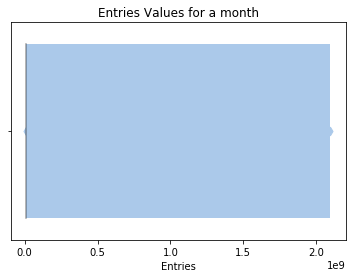

In [29]:
#Understanding data-2 with boxenplot

ax = sns.boxenplot(x='ENTRIES', data=mta_2,palette="pastel").set(xlabel='Entries',title="Entries Values for a month")

In [30]:
#Finding Daily traffic(entries+exits) based on turnstile

mta_entries = mta.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).ENTRIES.max() - mta.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).ENTRIES.min()

mta_exits = mta.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).EXITS.max() - mta.groupby(["STATION","TURNSTILE","DATE","NAMEOFDAY"]).EXITS.min()

mta_entries = mta_entries.reset_index()

mta_exits = mta_exits.reset_index()

mta_entries_exits = pd.merge(mta_entries, mta_exits, how="outer")

mta_entries_exits["TRAFFIC"] = mta_entries_exits["ENTRIES"] + mta_entries_exits["EXITS"]

print(mta_entries_exits.sample(10))

                STATION            TURNSTILE        DATE  NAMEOFDAY  ENTRIES  \
349312         CANAL ST   A046-R463-00-03-00  03/30/2019   Saturday     2496   
249620  82 ST-JACKSON H   R526-R096-00-05-03  01/23/2019  Wednesday     1250   
595755         NEWARK C  PTH19-R549-02-00-01  01/15/2019    Tuesday      456   
356221  CANARSIE-ROCKAW   H041-R152-00-00-03  02/26/2019    Tuesday     1930   
471299         GRAND ST   H016-R250-00-00-00  03/25/2019     Monday      534   
317486        BERGEN ST   N531-R129-01-00-01  03/16/2019   Saturday      373   
256920            86 ST   R249-R179-01-00-05  05/05/2019     Sunday      427   
100376            28 ST   R134-R272-01-06-02  05/24/2019     Friday       17   
86285             23 ST   N508-R453-00-00-00  01/02/2019  Wednesday     1376   
533862    JUNCTION BLVD   R528-R097-00-00-00  02/22/2019     Friday     1513   

        EXITS  TRAFFIC  
349312   2497     4993  
249620   2158     3408  
595755     10      466  
356221    404     2

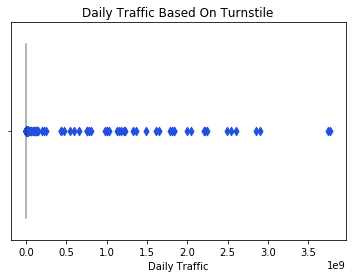

In [31]:
#Boxenplot for daily traffic

ax = sns.boxenplot(x='TRAFFIC', data=mta_entries_exits,palette="bright").set(xlabel='Daily Traffic',title="Daily Traffic Based On Turnstile")

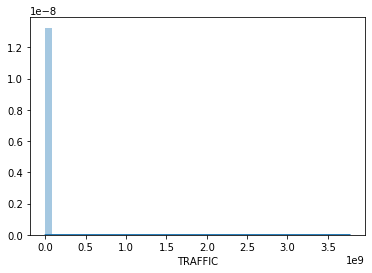

In [32]:
# Distplot for daily traffic

ax = sns.distplot(mta_entries_exits["TRAFFIC"])

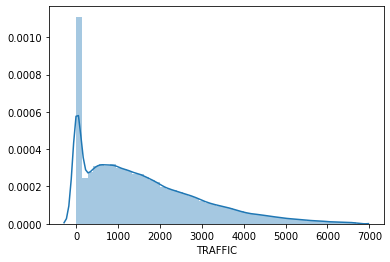

In [33]:
# Finding optimal daily traffic

mta_traffic_under_percentile99 = mta_entries_exits[mta_entries_exits["TRAFFIC"]<(mta_entries_exits.TRAFFIC.quantile(0.99))]
ax=sns.distplot(mta_traffic_under_percentile99["TRAFFIC"])

In [34]:
mta_traffic_under_percentile99.describe()

,ENTRIES,EXITS,TRAFFIC
count,720771.000000,720771.000000,720771.000000
mean,923.041797,692.336344,1615.378141
std,877.971798,787.548700,1391.069385
min,0.000000,0.000000,0.000000
25%,221.000000,126.000000,504.000000
50%,702.000000,434.000000,1319.000000
75%,1393.000000,976.000000,2427.000000
max,6433.000000,6266.000000,6681.000000


In [35]:
mta_traffic_under_percentile99.sort_values("TRAFFIC", ascending=False).head(10)

,STATION,TURNSTILE,DATE,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
538563,KEW GARDENS,N336-R158-00-03-00,03/15/2019,Friday,3219,3462,6681
557735,LEXINGTON AV/53,N306-R017-00-03-02,01/24/2019,Thursday,3091,3590,6681
34105,14 ST-UNION SQ,A034-R170-03-00-00,03/22/2019,Friday,475,6206,6681
696496,W 4 ST-WASH SQ,N080-R138-00-00-00,03/21/2019,Thursday,1549,5132,6681
161850,47-50 STS ROCK,N500-R020-00-00-01,04/16/2019,Tuesday,2512,4168,6680
313738,BEDFORD AV,H009-R235-00-03-04,04/12/2019,Friday,4932,1748,6680
436443,FLUSHING-MAIN,R533-R055-00-03-00,02/16/2019,Saturday,3258,3421,6679
16367,125 ST,N026-R102-00-00-07,03/05/2019,Tuesday,4267,2412,6679
267769,96 ST,R169-R168-01-03-00,04/12/2019,Friday,964,5715,6679
116848,34 ST-HERALD SQ,N506-R022-00-00-00,02/18/2019,Monday,2397,4282,6679


In [36]:
# Finding top 7 busiest stations based on traffic

mta_top7 = mta_traffic_under_percentile99.groupby("STATION").sum().sort_values("TRAFFIC",ascending=False).head(7)
mta_top7 = mta_top7.reset_index()
mta_top7

,STATION,ENTRIES,EXITS,TRAFFIC
0,34 ST-PENN STA,19138556,16904205,36042761
1,23 ST,13301469,10235294,23536763
2,GRD CNTRL-42 ST,12761709,9838643,22600352
3,34 ST-HERALD SQ,12210163,9612232,21822395
4,TIMES SQ-42 ST,10616352,10438632,21054984
5,FULTON ST,11132157,9647415,20779572
6,42 ST-PORT AUTH,10986492,7195419,18181911


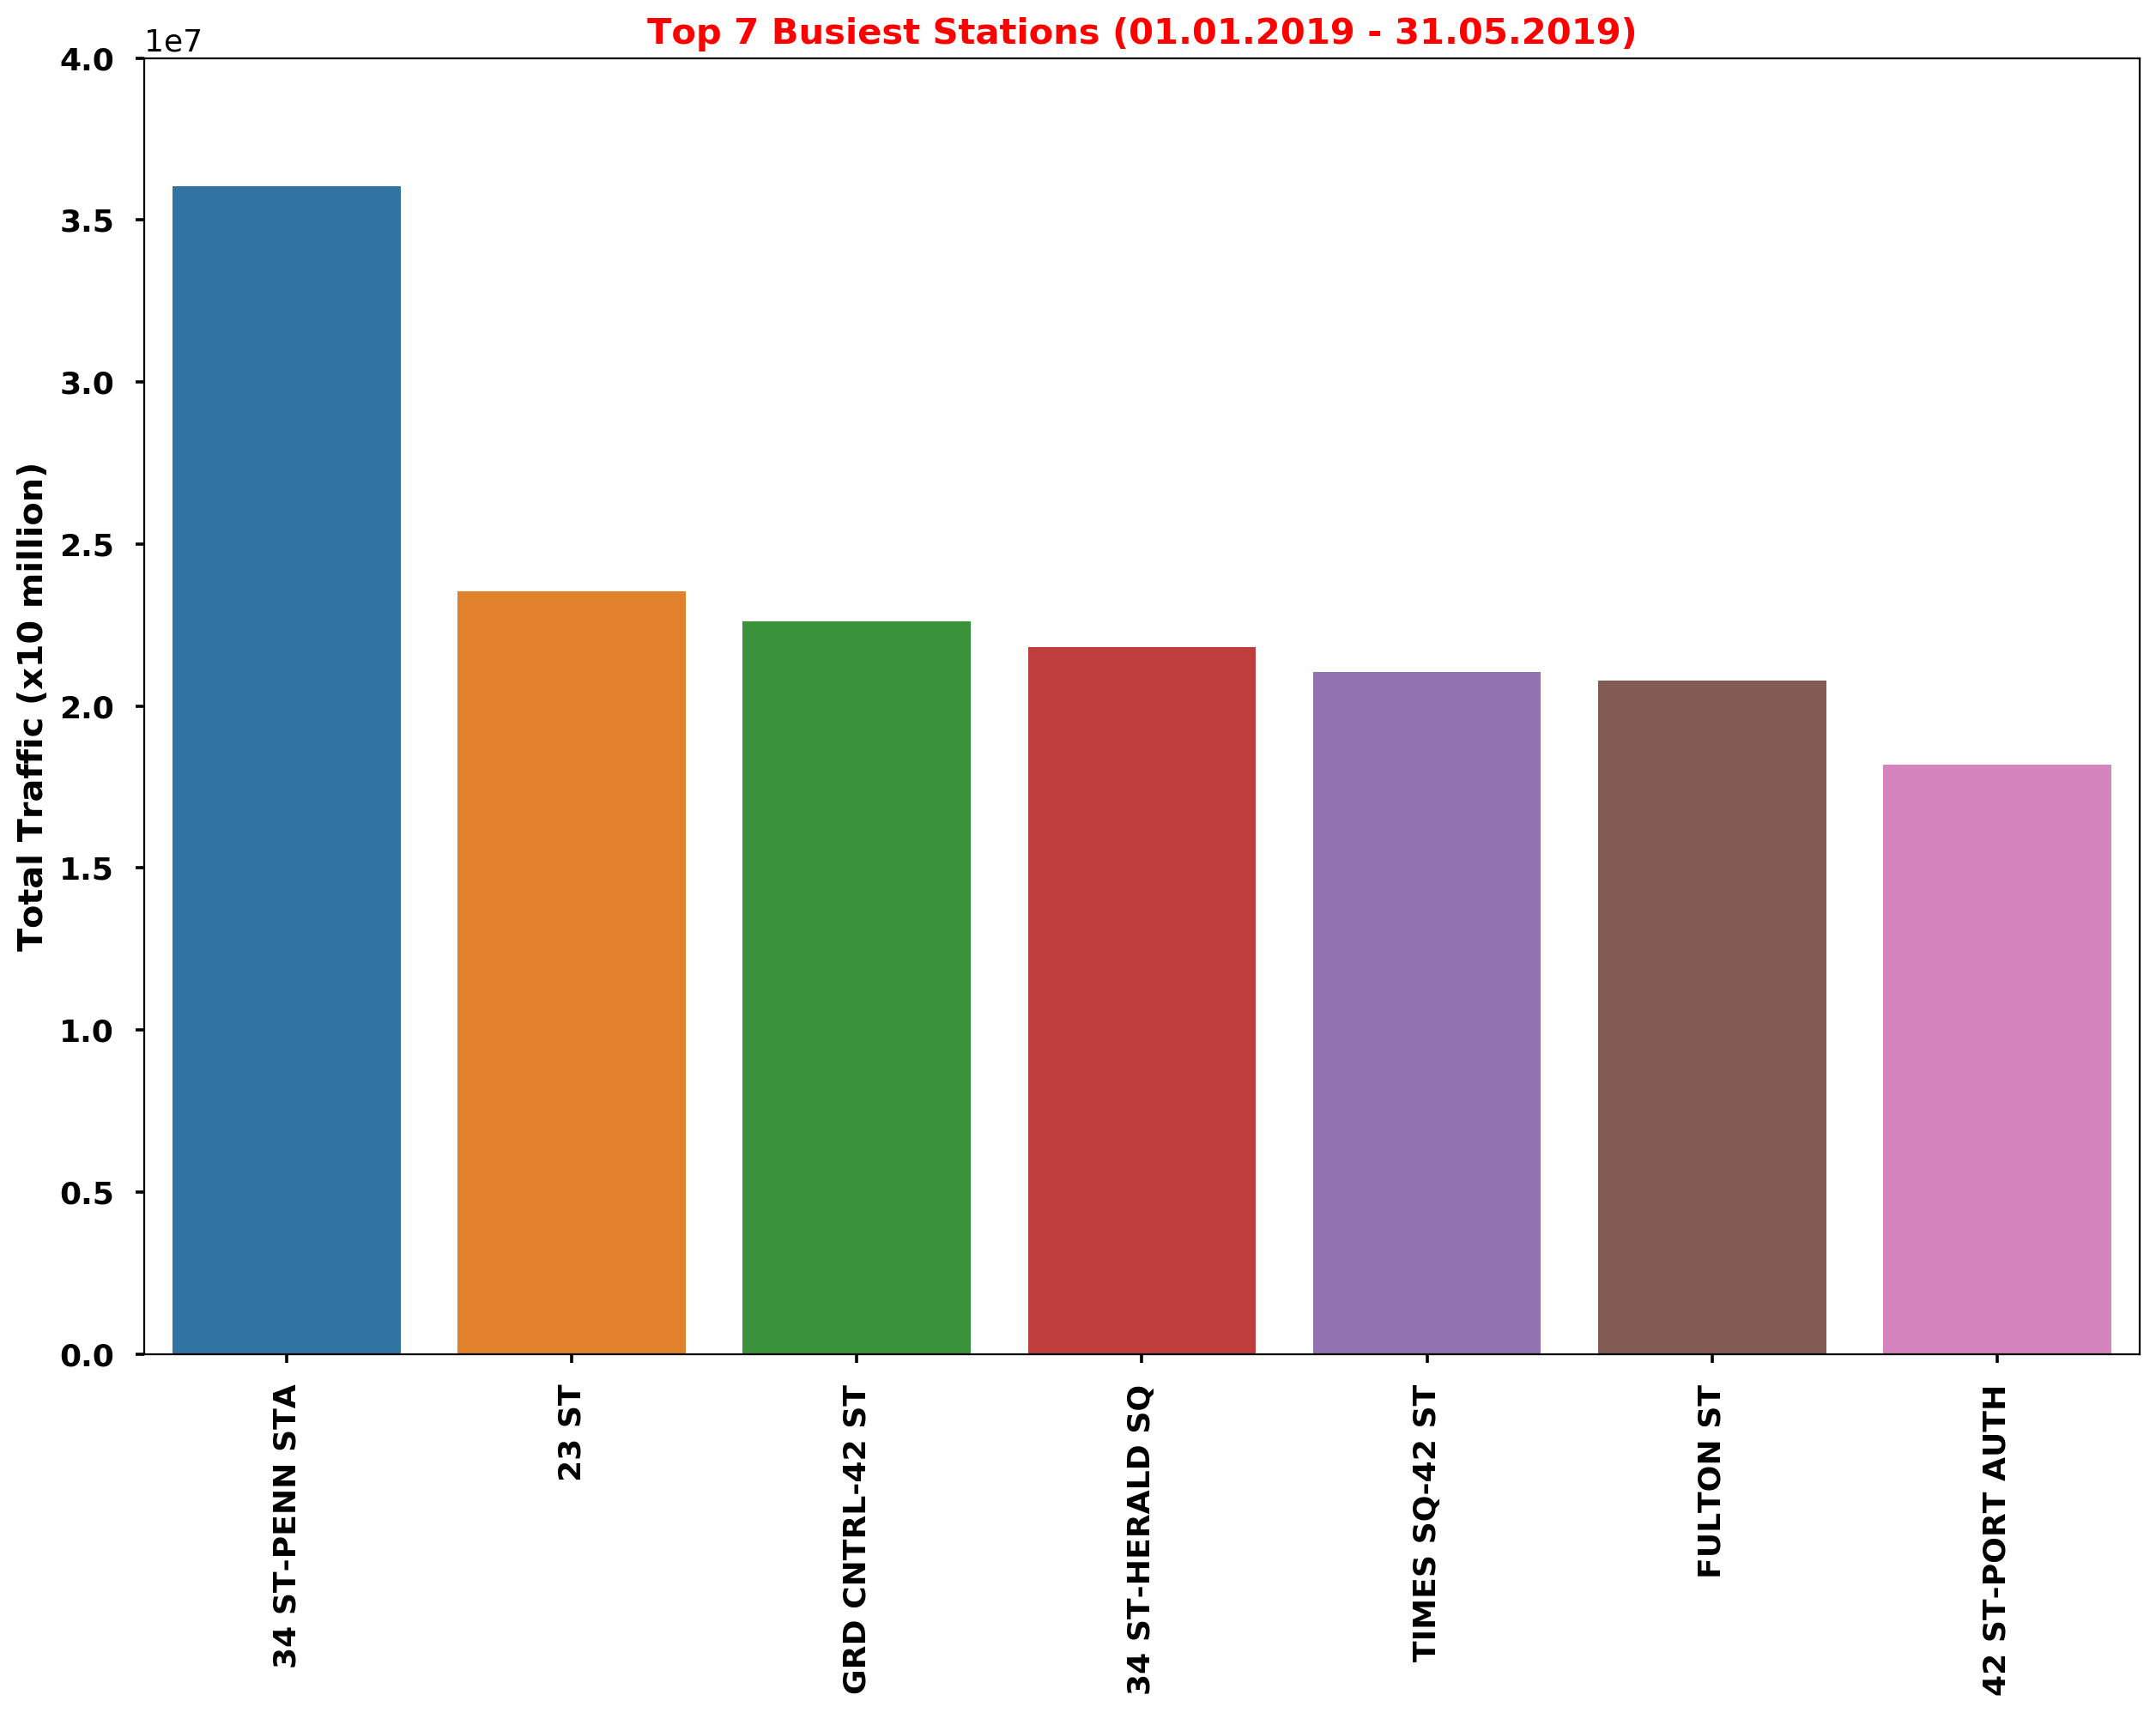

In [37]:
#Barplot for Top 7 Busiest Stations

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('seaborn-talk')
ax = sns.barplot(x="STATION", y="TRAFFIC", data=mta_top7)
plt.title("Top 7 Busiest Stations (01.01.2019 - 31.05.2019)", weight="bold", c="r", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Total Traffic (x10 million)",weight= "bold",c="k")
plt.ylim(0,40000000)
plt.yticks(weight="bold")
plt.savefig('images/01_Top7BusiesStationsBarPlot.png', dpi=200)
plt.show()

In [38]:
# Finding overall busiest day based on traffic

mta_busiest_day = mta_traffic_under_percentile99.groupby("NAMEOFDAY").sum().sort_values("TRAFFIC",ascending=False)
mta_busiest_day = mta_busiest_day.reset_index()
mta_busiest_day


,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
0,Wednesday,117607943,86350766,203958709
1,Thursday,117147984,85924914,203072898
2,Friday,113234423,83823566,197057989
3,Tuesday,113354109,83544591,196898700
4,Monday,100844121,74898309,175742430
5,Saturday,58344705,47493030,105837735
6,Sunday,44768474,36980783,81749257


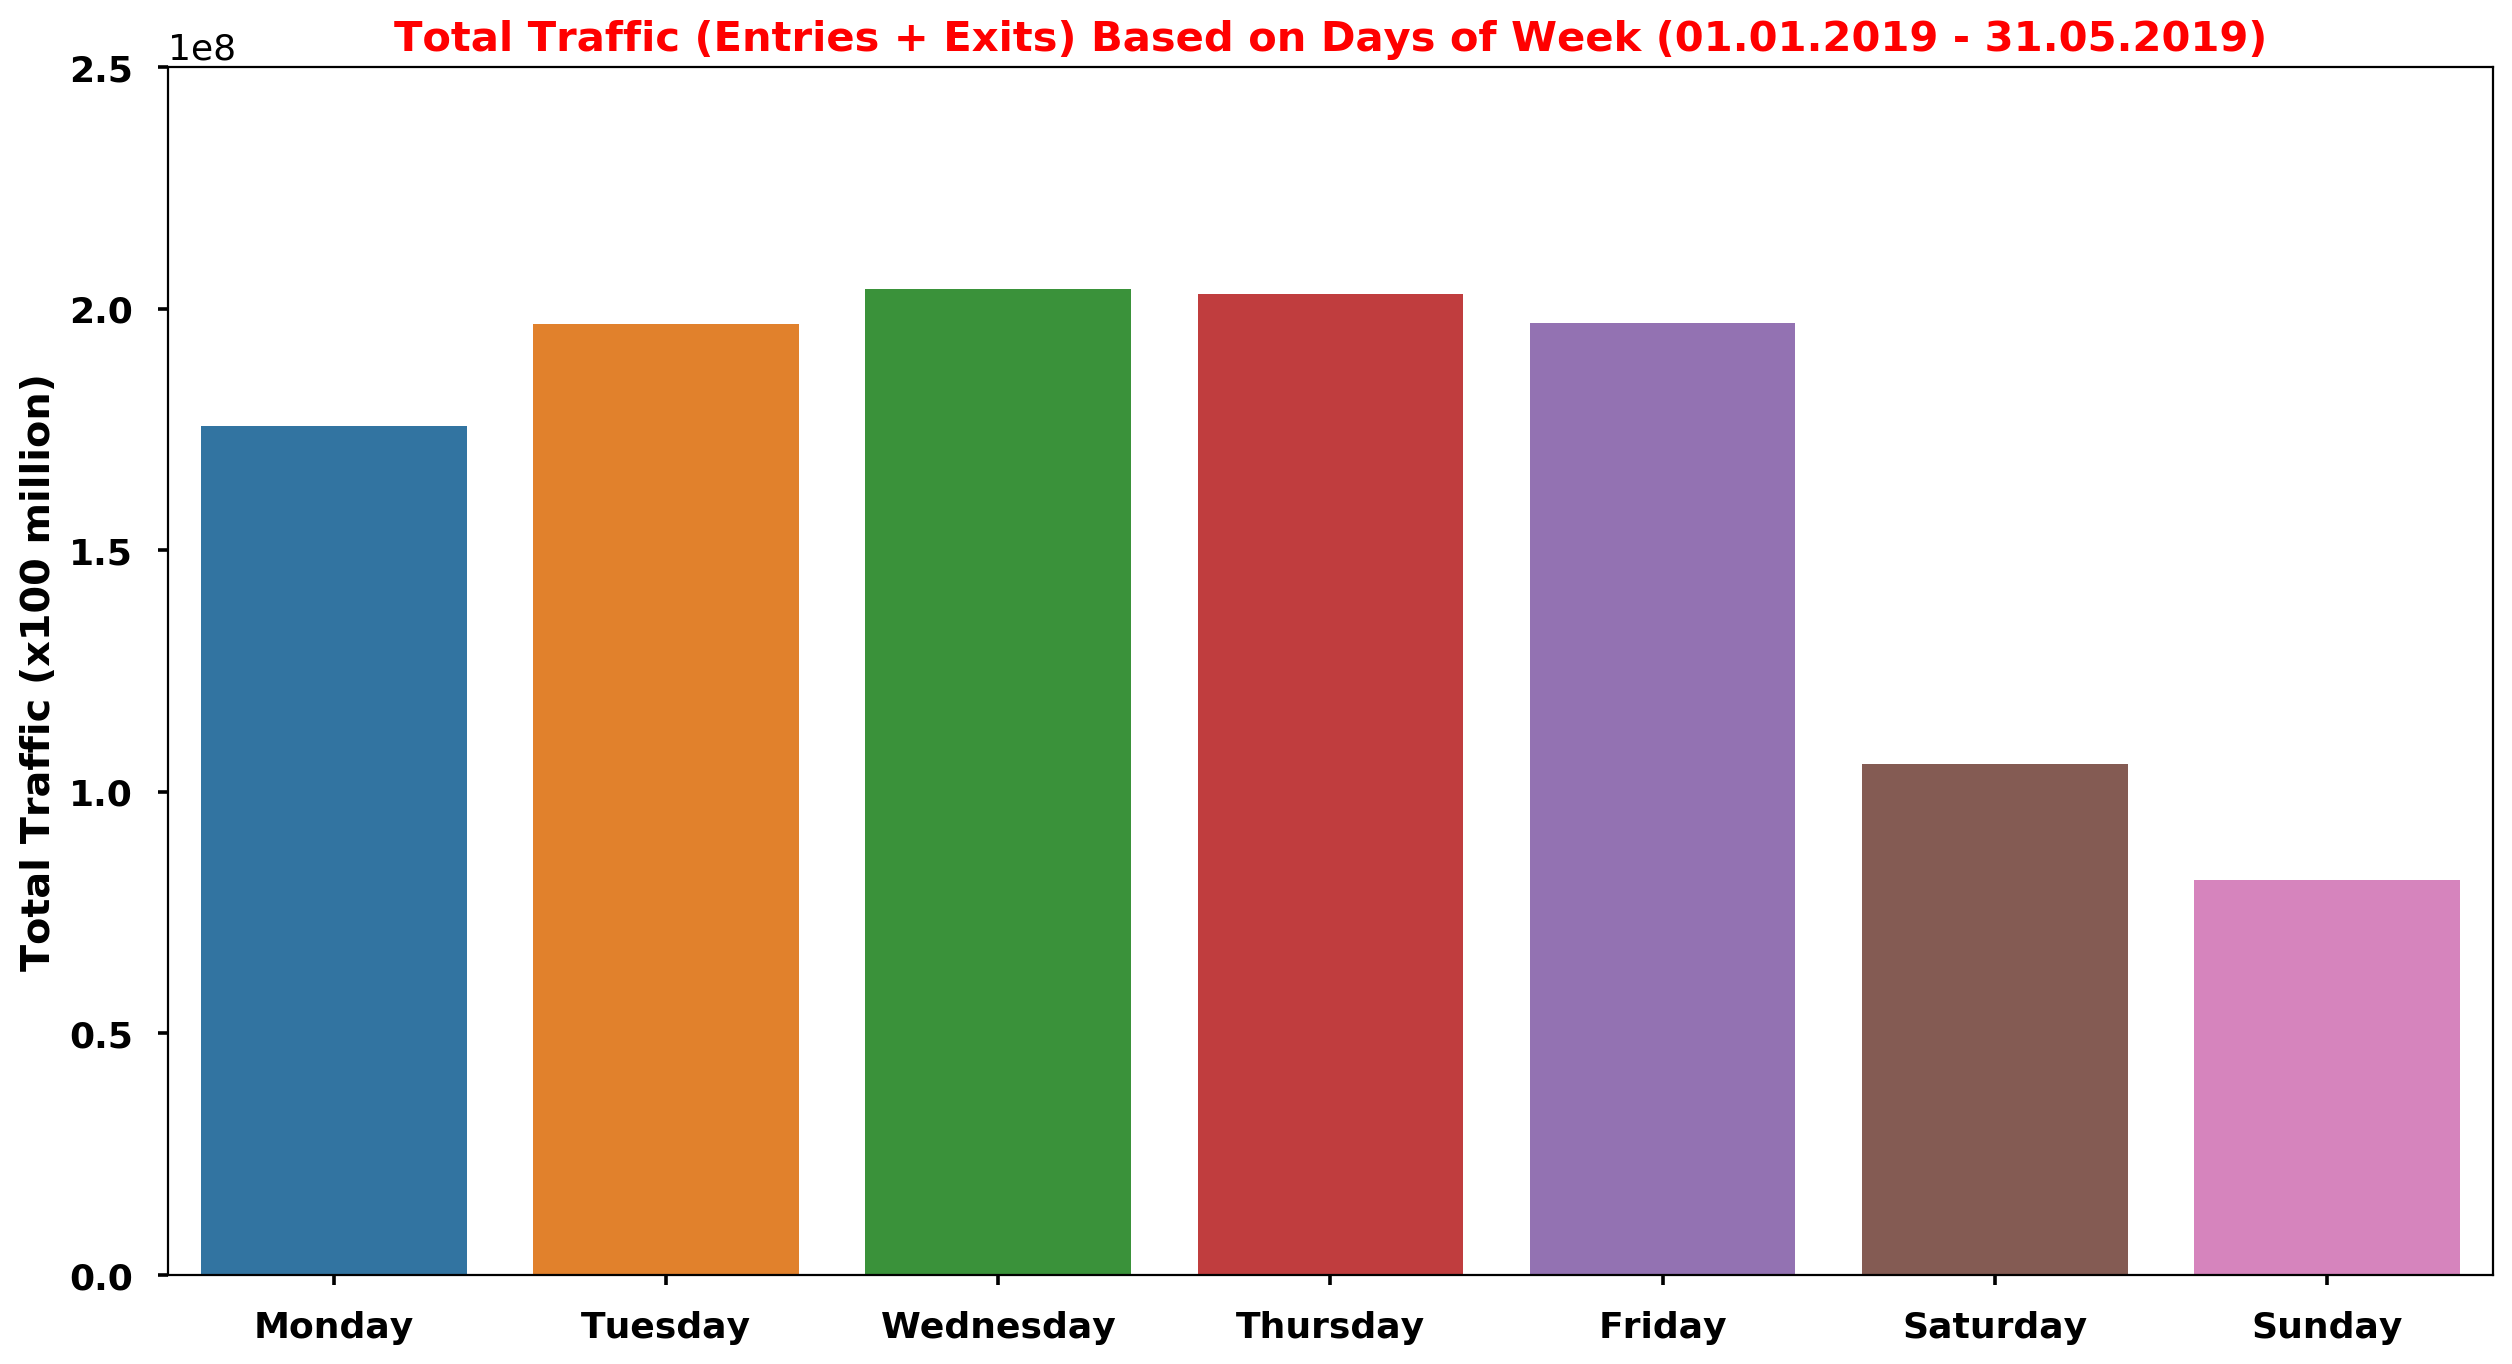

In [39]:
#Barplot for total traffic
plt.figure(figsize=(15,8),dpi=200),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="NAMEOFDAY",y="TRAFFIC",data=mta_busiest_day, order=["Monday","Tuesday","Wednesday","Thursday",
                                                                       "Friday","Saturday","Sunday"])

plt.title("Total Traffic (Entries + Exits) Based on Days of Week (01.01.2019 - 31.05.2019)", weight="bold", c="r",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Traffic (x100 million)",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.ylim(0,250000000)
plt.savefig('images/02_TotalTrafficPerDayBarPlot.png', dpi=200)
plt.show()


In [40]:
#Finding busiest days of week based on Top3 Busiest Stations
mta_station_day = mta_traffic_under_percentile99.groupby(["STATION","NAMEOFDAY"]).sum()
top1 = mta_station_day.loc["34 ST-PENN STA"]
top2 = mta_station_day.loc["23 ST"]
top3 = mta_station_day.loc["GRD CNTRL-42 ST"]

top1 = top1.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
top2 = top2.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
top3 = top3.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

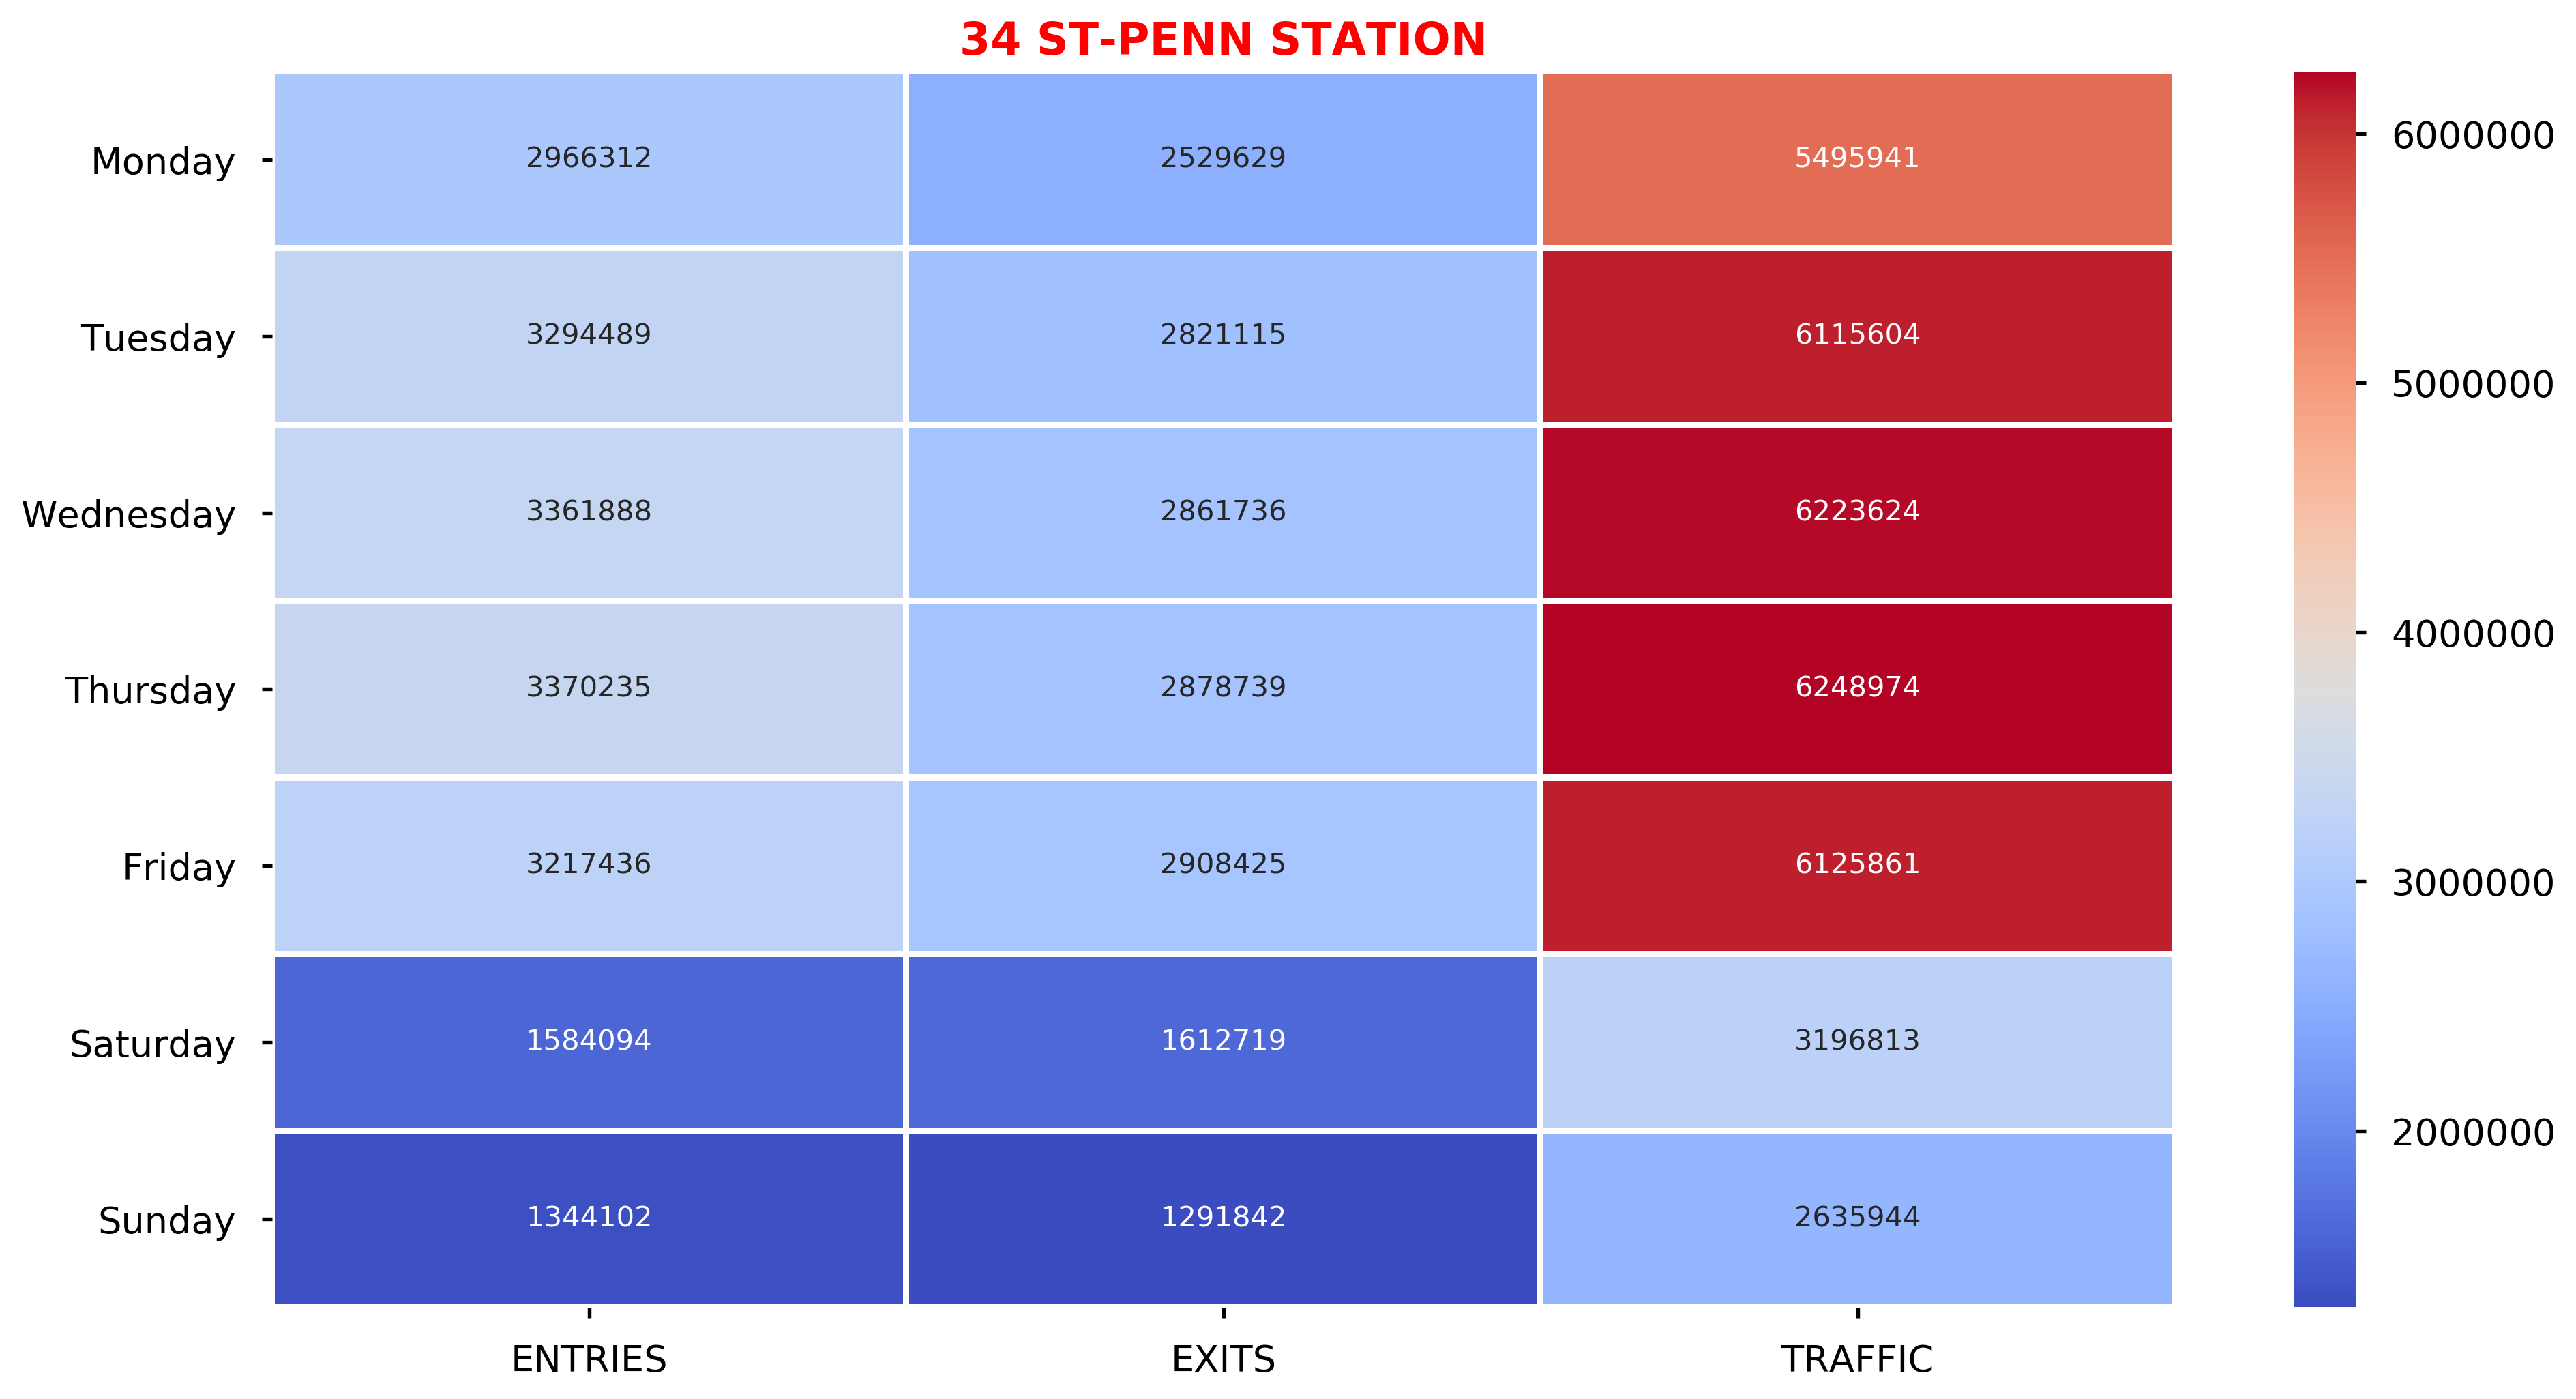

In [41]:
#Heatmap for top1 station
plt.figure(figsize=(15,8),dpi=300),
plt.style.use('seaborn-bright')
sns.heatmap(top1,annot=True,fmt="d", linewidths=2, cmap="coolwarm")
plt.title("34 ST-PENN STATION",weight="bold",c="r")
plt.ylabel("")
plt.show()

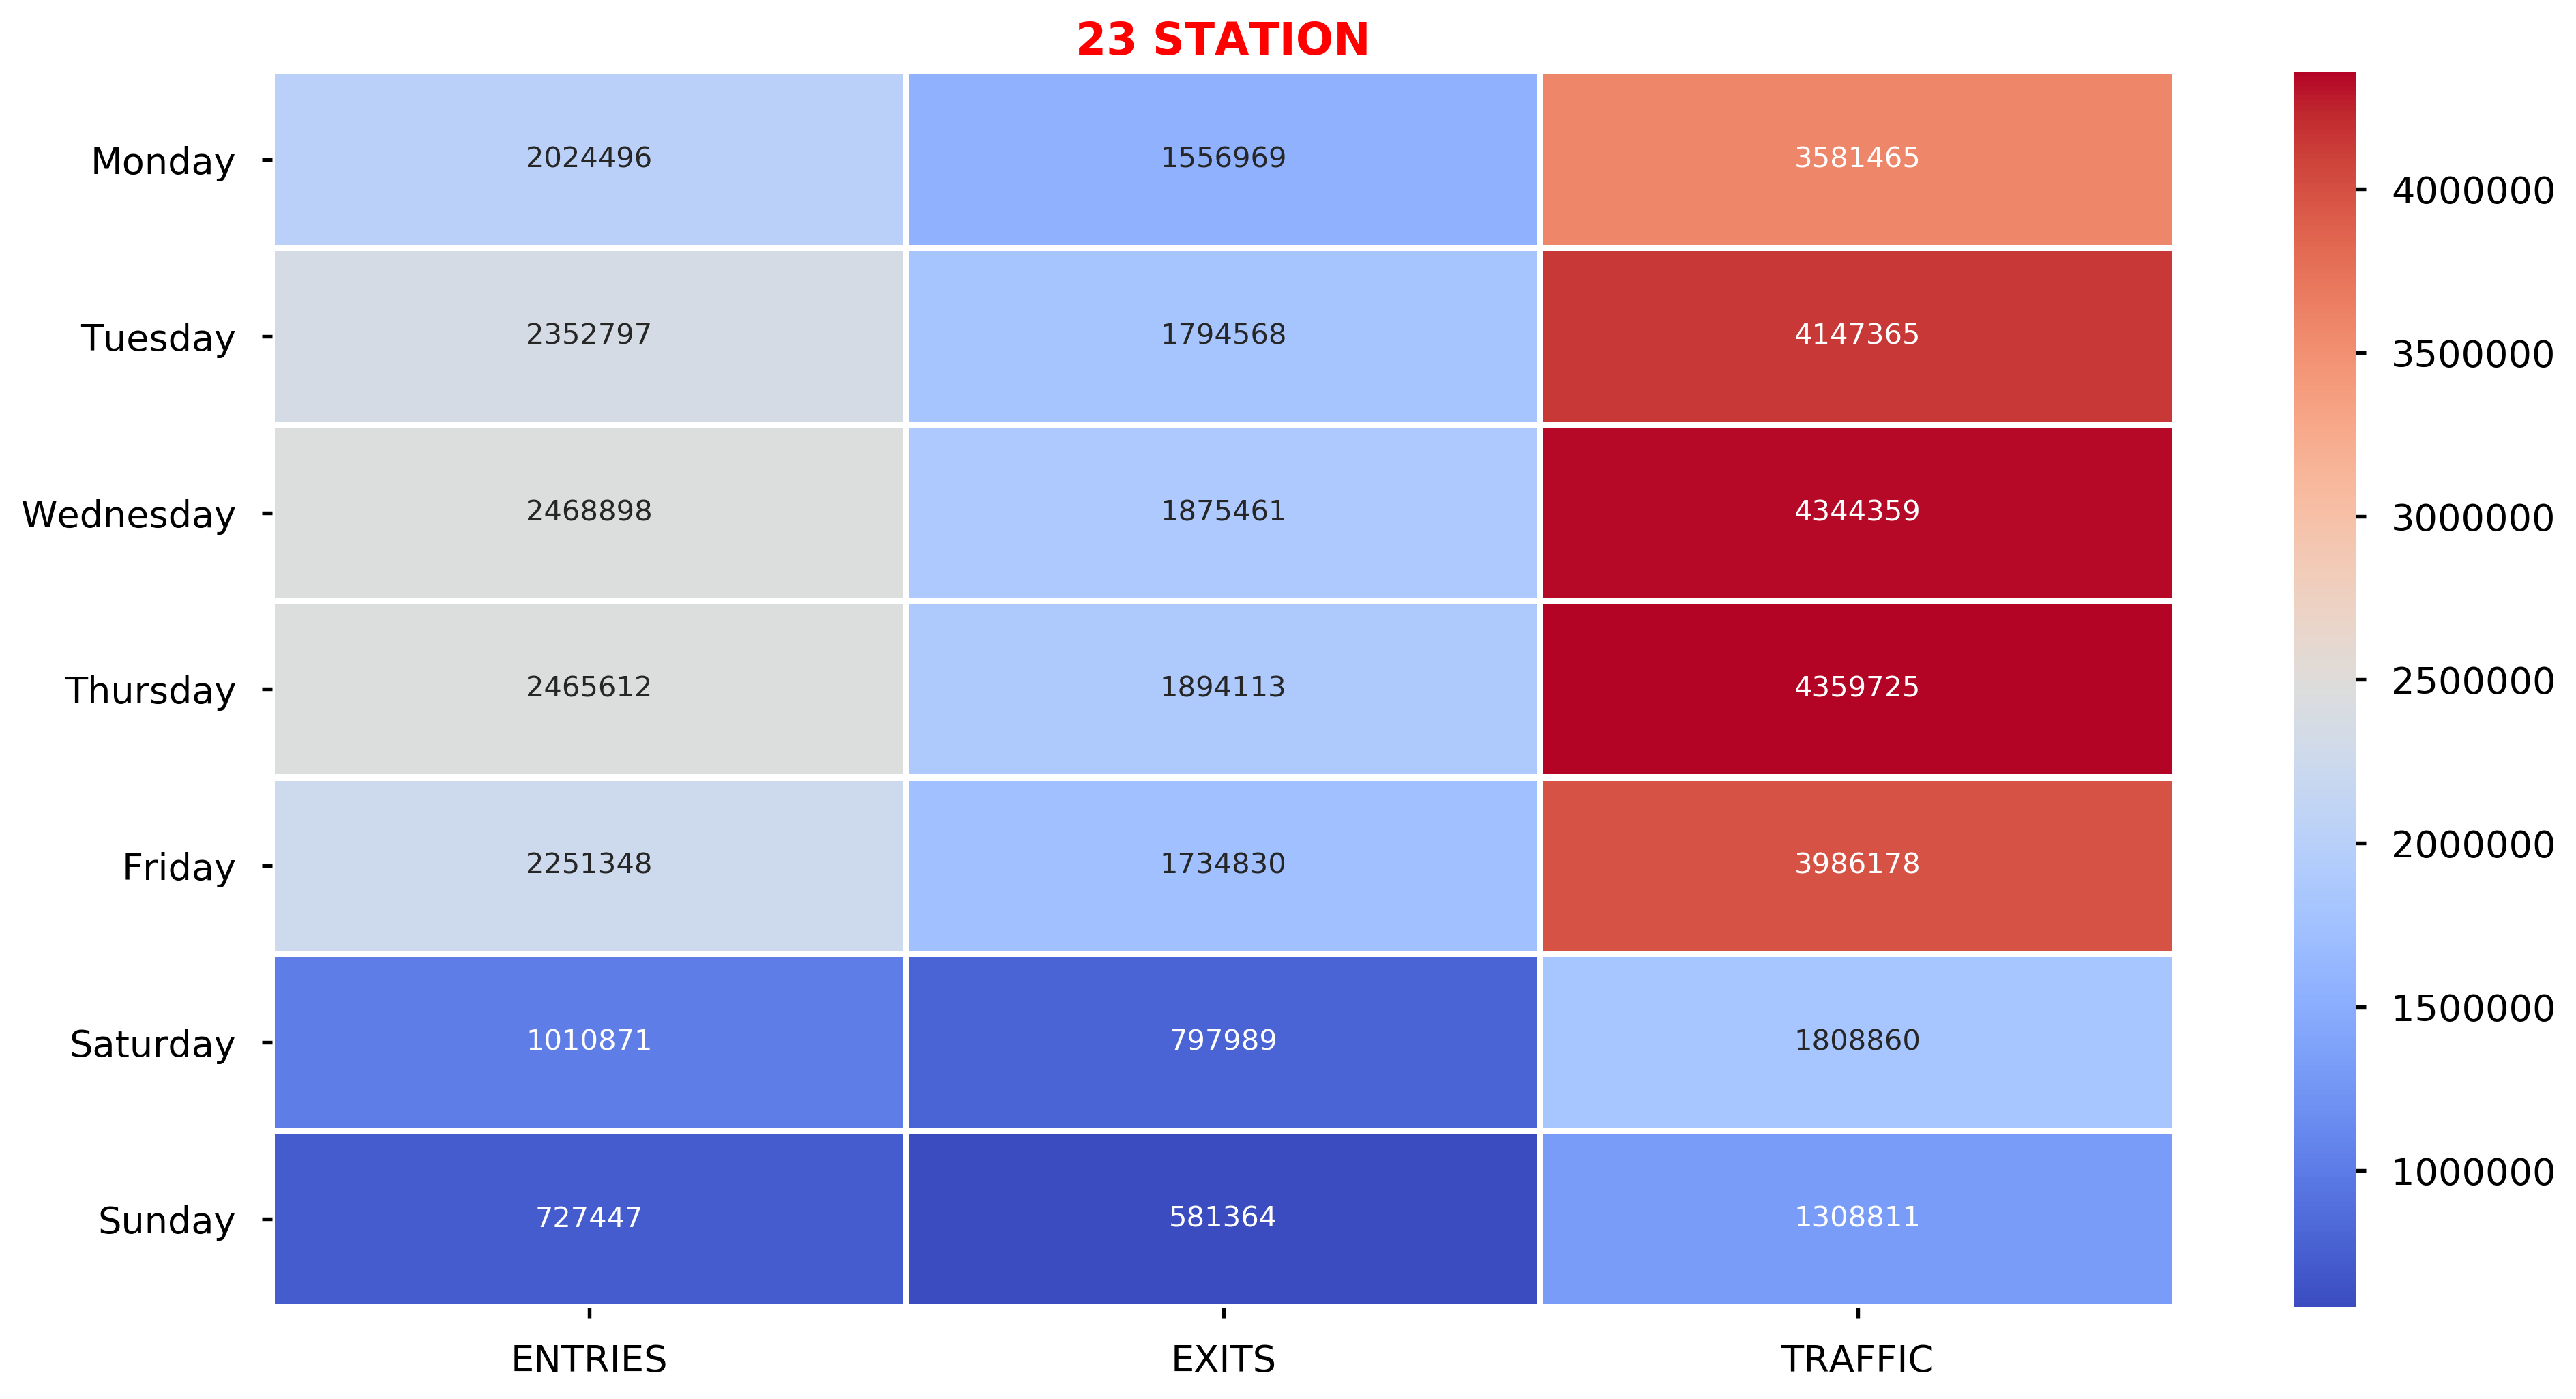

In [42]:
#Heatmap for top2 station
plt.figure(figsize=(15,8),dpi=300),
sns.heatmap(top2,annot=True,fmt="d", linewidths=2, cmap="coolwarm")
plt.style.use('seaborn-bright')
plt.title("23 STATION",weight="bold",c="r")
plt.ylabel("")
plt.show()

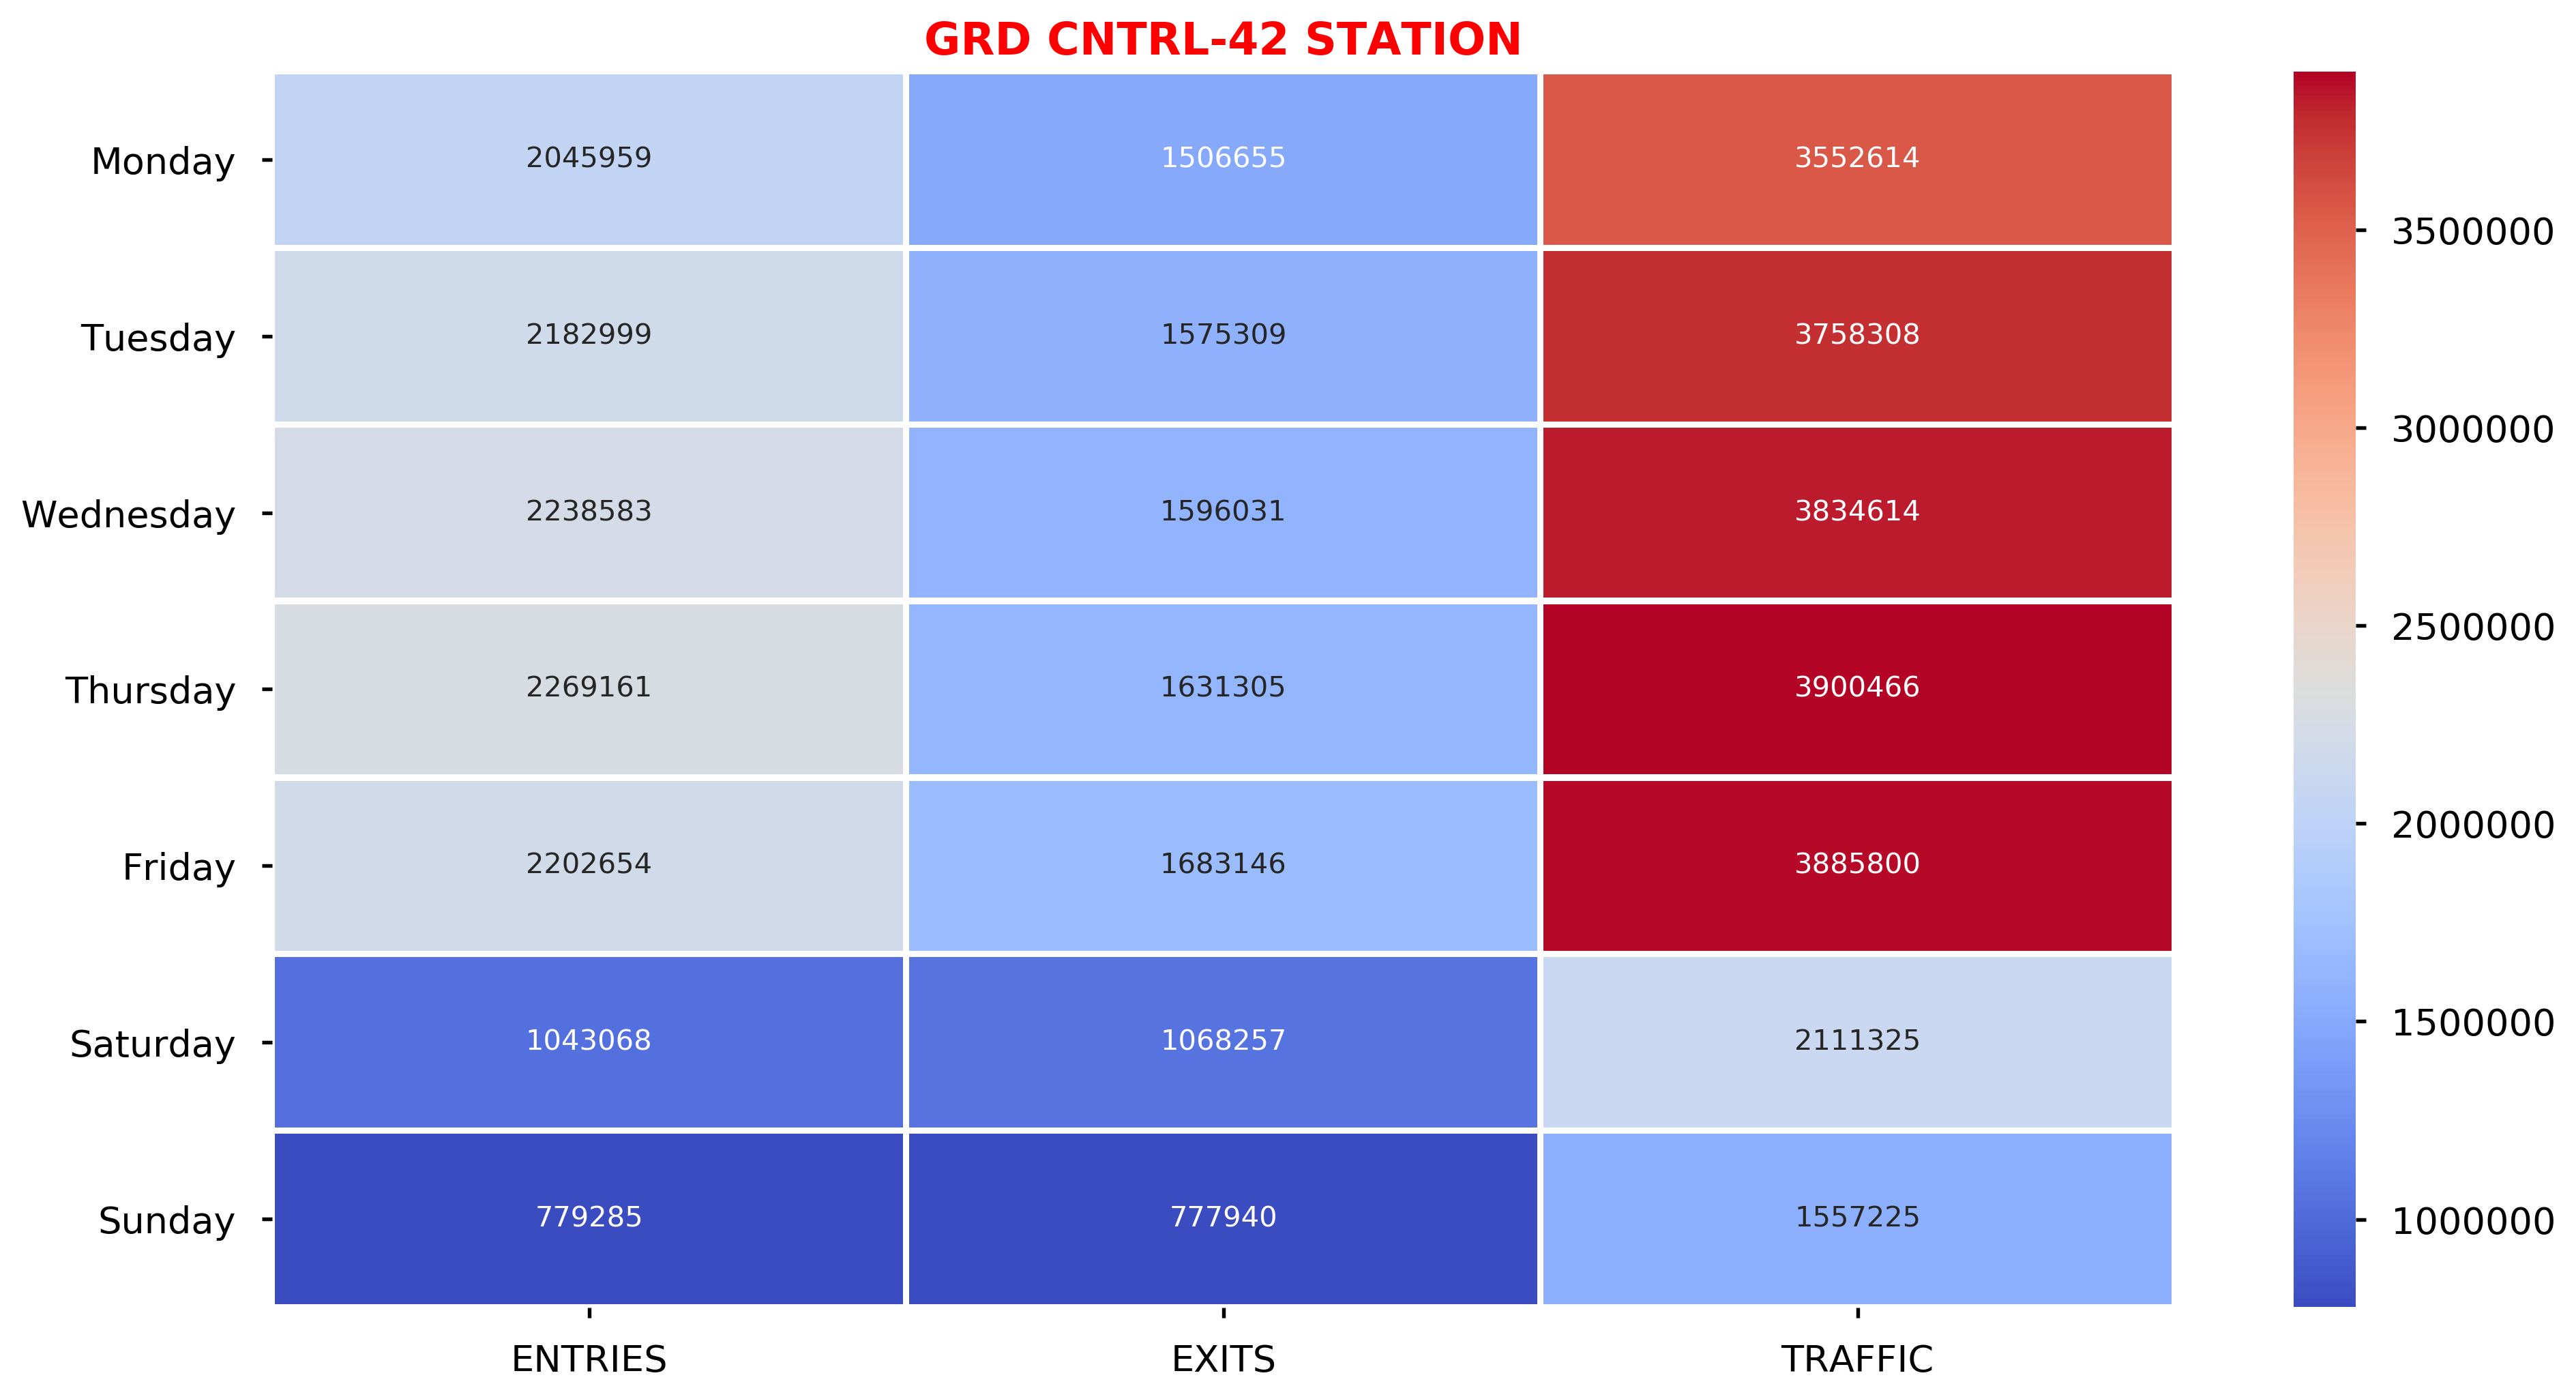

In [43]:
#Heatmap for top3 station
plt.figure(figsize=(15,8),dpi=300),
sns.heatmap(top3,annot=True,fmt="d", linewidths=2, cmap="coolwarm")
plt.style.use('seaborn-bright')
plt.ylabel("")
plt.title("GRD CNTRL-42 STATION",weight="bold",c="r")
plt.show()

In [44]:
#Daily Usage for Top 7 Stations
mta_top7_daily = mta_traffic_under_percentile99.groupby(["STATION","NAMEOFDAY"]).sum()

mta_top7_daily = mta_top7_daily.reset_index()

mta_top7_daily = mta_top7_daily[(mta_top7_daily["STATION"]=="34 ST-PENN STA") 
                  | (mta_top7_daily["STATION"]=="23 ST")
                  | (mta_top7_daily["STATION"]=='GRD CNTRL-42 ST')
                  | (mta_top7_daily["STATION"]=='34 ST-HERALD SQ')
                  | (mta_top7_daily["STATION"]=="TIMES SQ-42 ST")
                  | (mta_top7_daily["STATION"]=="FULTON ST")
                  | (mta_top7_daily["STATION"]=="42 ST-PORT AUTH")]


mta_top7_daily = mta_top7_daily.reset_index()

mta_top7_daily

,index,STATION,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
0,322,23 ST,Friday,2251348,1734830,3986178
1,323,23 ST,Monday,2024496,1556969,3581465
2,324,23 ST,Saturday,1010871,797989,1808860
3,325,23 ST,Sunday,727447,581364,1308811
4,326,23 ST,Thursday,2465612,1894113,4359725
5,327,23 ST,Tuesday,2352797,1794568,4147365
6,328,23 ST,Wednesday,2468898,1875461,4344359
7,413,34 ST-HERALD SQ,Friday,1977825,1512220,3490045
8,414,34 ST-HERALD SQ,Monday,1868383,1384153,3252536
9,415,34 ST-HERALD SQ,Saturday,1245662,1231777,2477439


In [45]:
#Reindex for top7 daily data frame

mta_top7_daily_order = mta_top7_daily.reindex(index = [1,5,6,4,0,2,3,8,12,13,11,7,9,10,15,19,20,18,14,16,17,22,26,27,25,21,23,24,29,33,34,32,28,30,31,36,40,41,39,35,37,38,43,47,48,46,42,44,45])

mta_top7_daily_order

,index,STATION,NAMEOFDAY,ENTRIES,EXITS,TRAFFIC
1,323,23 ST,Monday,2024496,1556969,3581465
5,327,23 ST,Tuesday,2352797,1794568,4147365
6,328,23 ST,Wednesday,2468898,1875461,4344359
4,326,23 ST,Thursday,2465612,1894113,4359725
0,322,23 ST,Friday,2251348,1734830,3986178
2,324,23 ST,Saturday,1010871,797989,1808860
3,325,23 ST,Sunday,727447,581364,1308811
8,414,34 ST-HERALD SQ,Monday,1868383,1384153,3252536
12,418,34 ST-HERALD SQ,Tuesday,2010607,1469429,3480036
13,419,34 ST-HERALD SQ,Wednesday,2065122,1517755,3582877


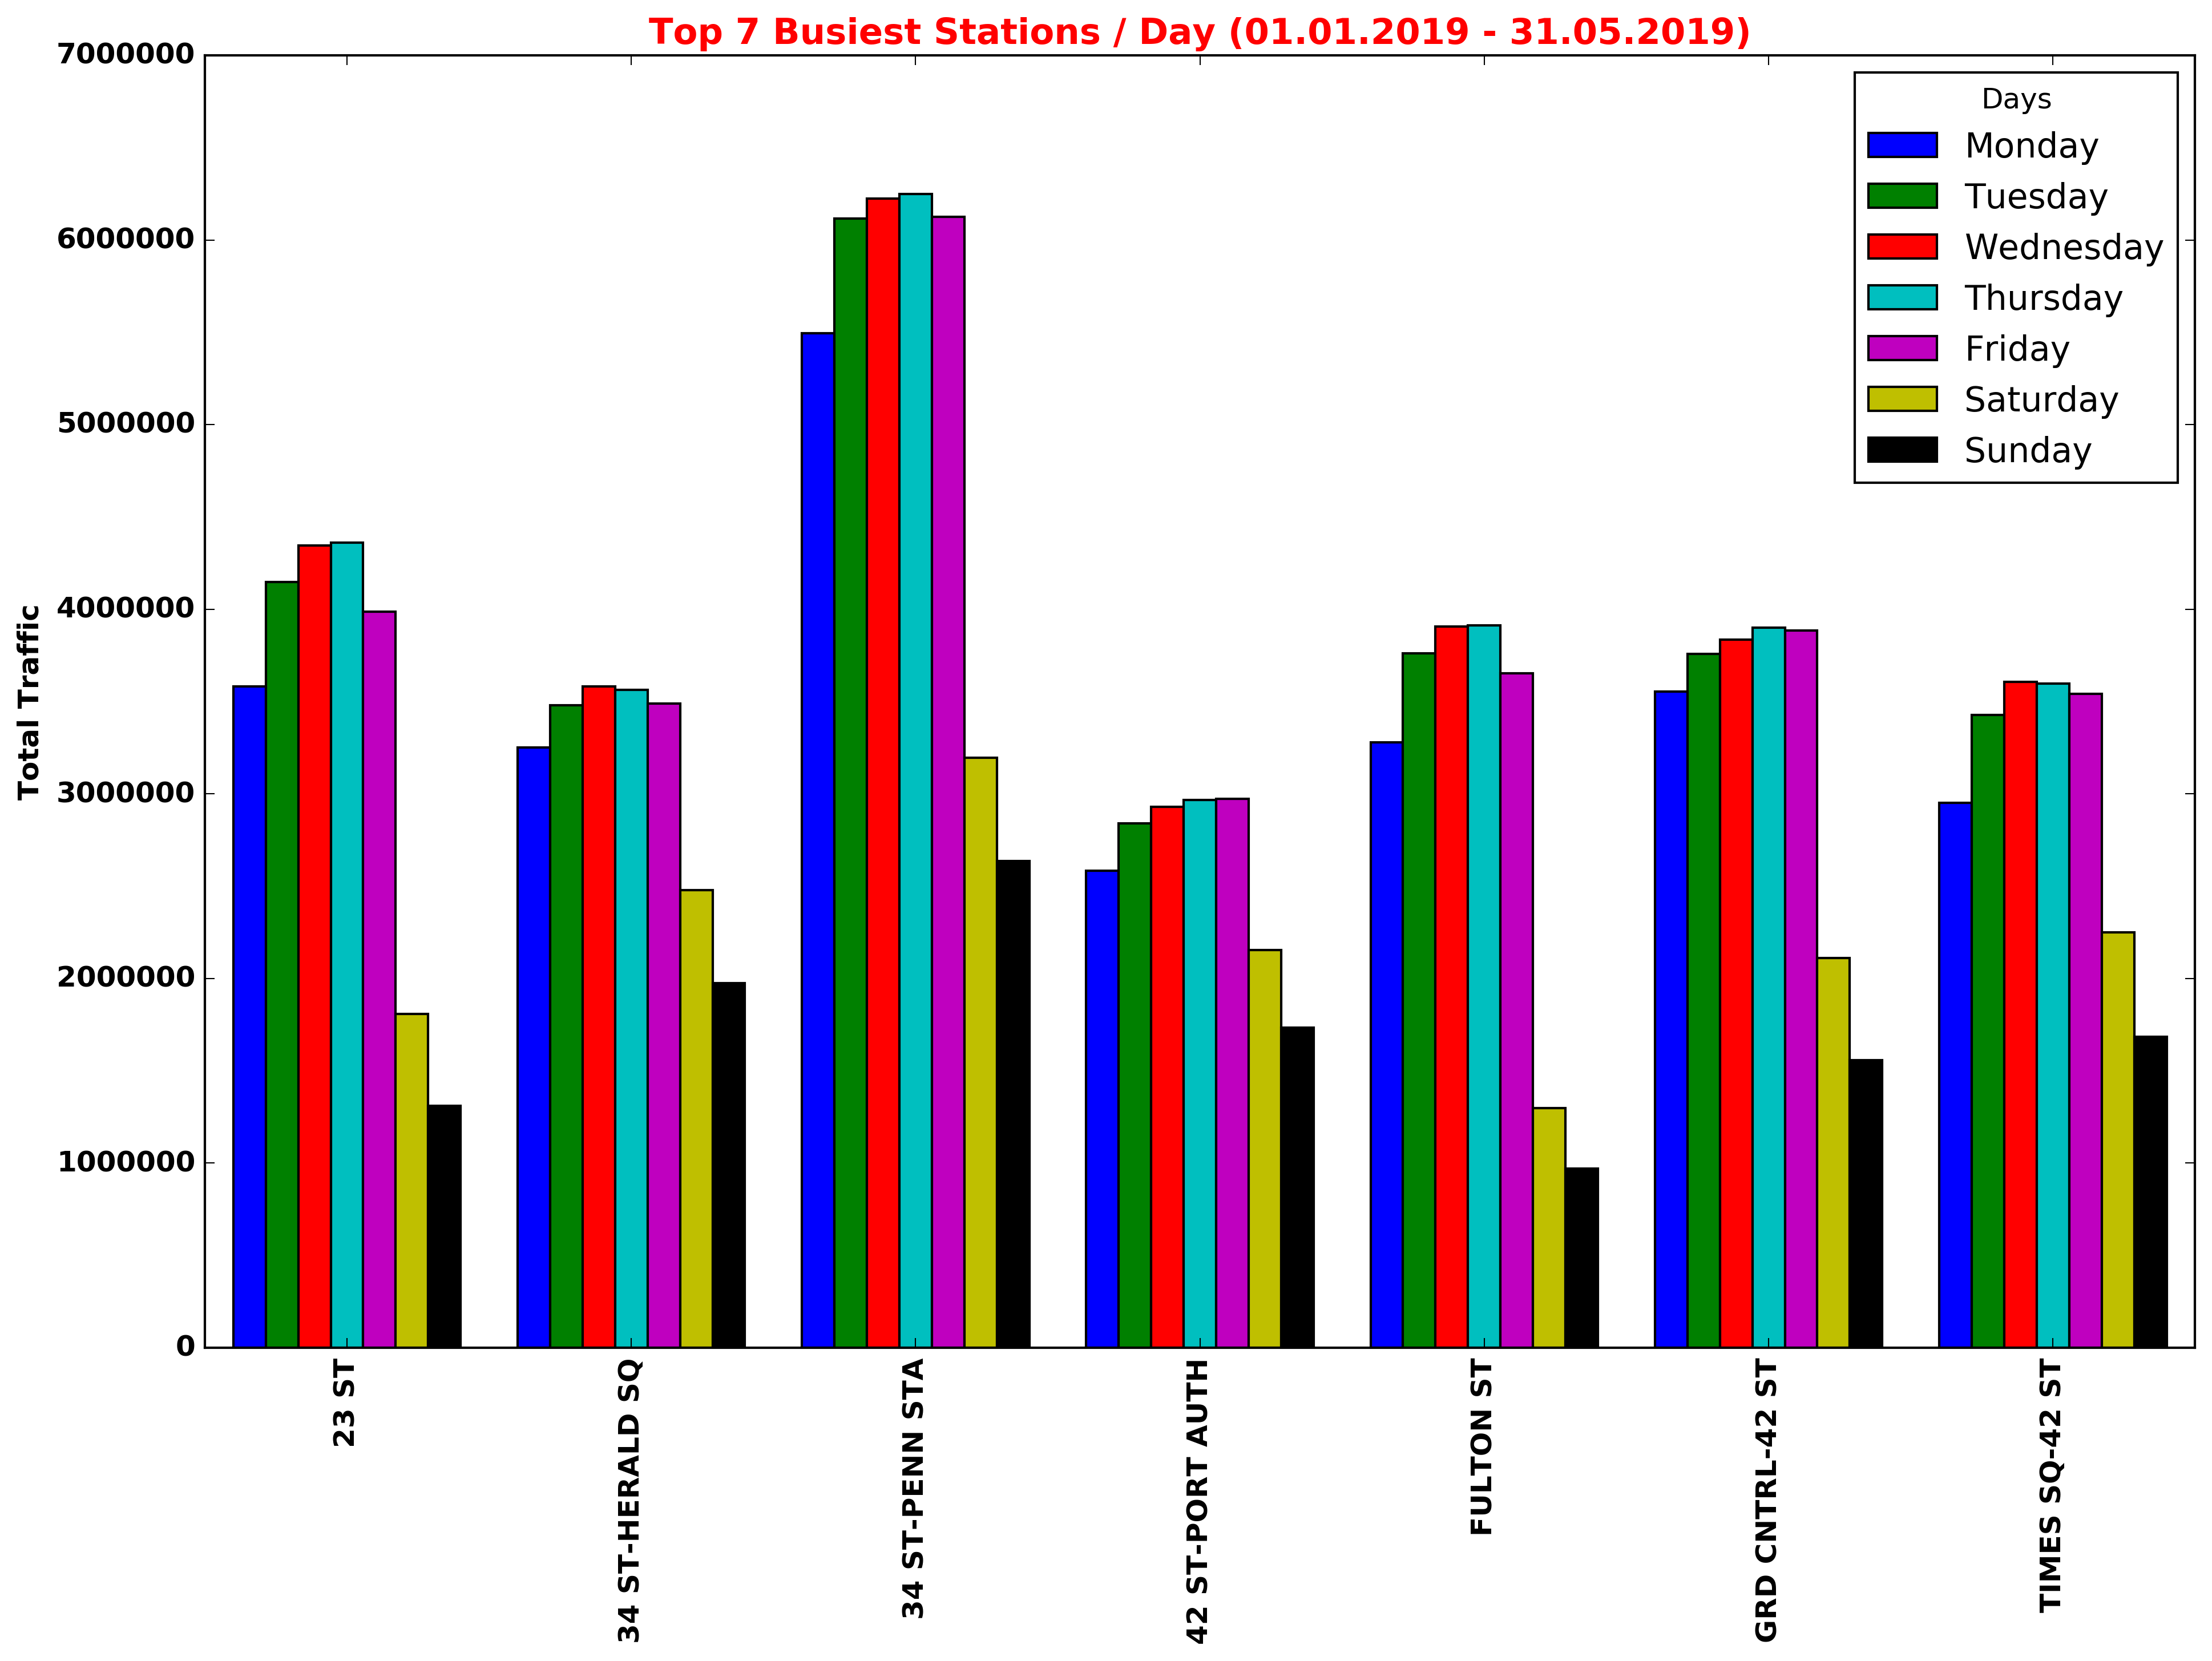

In [46]:
#Barplot for Top 7 Busiest Stations per Day

plt.figure(figsize=(15,10),dpi=300),
plt.style.use('classic')
ax = sns.barplot(x="STATION", y="TRAFFIC", hue="NAMEOFDAY",data=mta_top7_daily_order, saturation=1)
plt.title("Top 7 Busiest Stations / Day (01.01.2019 - 31.05.2019)", weight="bold", c="r", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.savefig('images/03_Top7BusiestStationsPerDayBarPlot.png', dpi=200)
plt.show()

In [47]:
#Creating Pivot table for heatmap

mta_top7_heatmap = mta_top7_daily_order.groupby(["STATION","NAMEOFDAY"]).TRAFFIC.mean().reset_index()

mta_top7_heatmap = mta_top7_heatmap.pivot("NAMEOFDAY","STATION","TRAFFIC")

mta_top7_heatmap = mta_top7_heatmap.reindex(index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

mta_top7_heatmap

STATION,23 ST,34 ST-HERALD SQ,34 ST-PENN STA,42 ST-PORT AUTH,FULTON ST,GRD CNTRL-42 ST,TIMES SQ-42 ST
NAMEOFDAY,,,,,,,
Monday,3581465,3252536,5495941,2584853,3279972,3552614,2950031
Tuesday,4147365,3480036,6115604,2839507,3759944,3758308,3428761
Wednesday,4344359,3582877,6223624,2931314,3906054,3834614,3606987
Thursday,4359725,3564355,6248974,2966139,3913591,3900466,3596122
Friday,3986178,3490045,6125861,2973259,3651620,3885800,3540827
Saturday,1808860,2477439,3196813,2154040,1296698,2111325,2249460
Sunday,1308811,1975107,2635944,1732799,971693,1557225,1682796


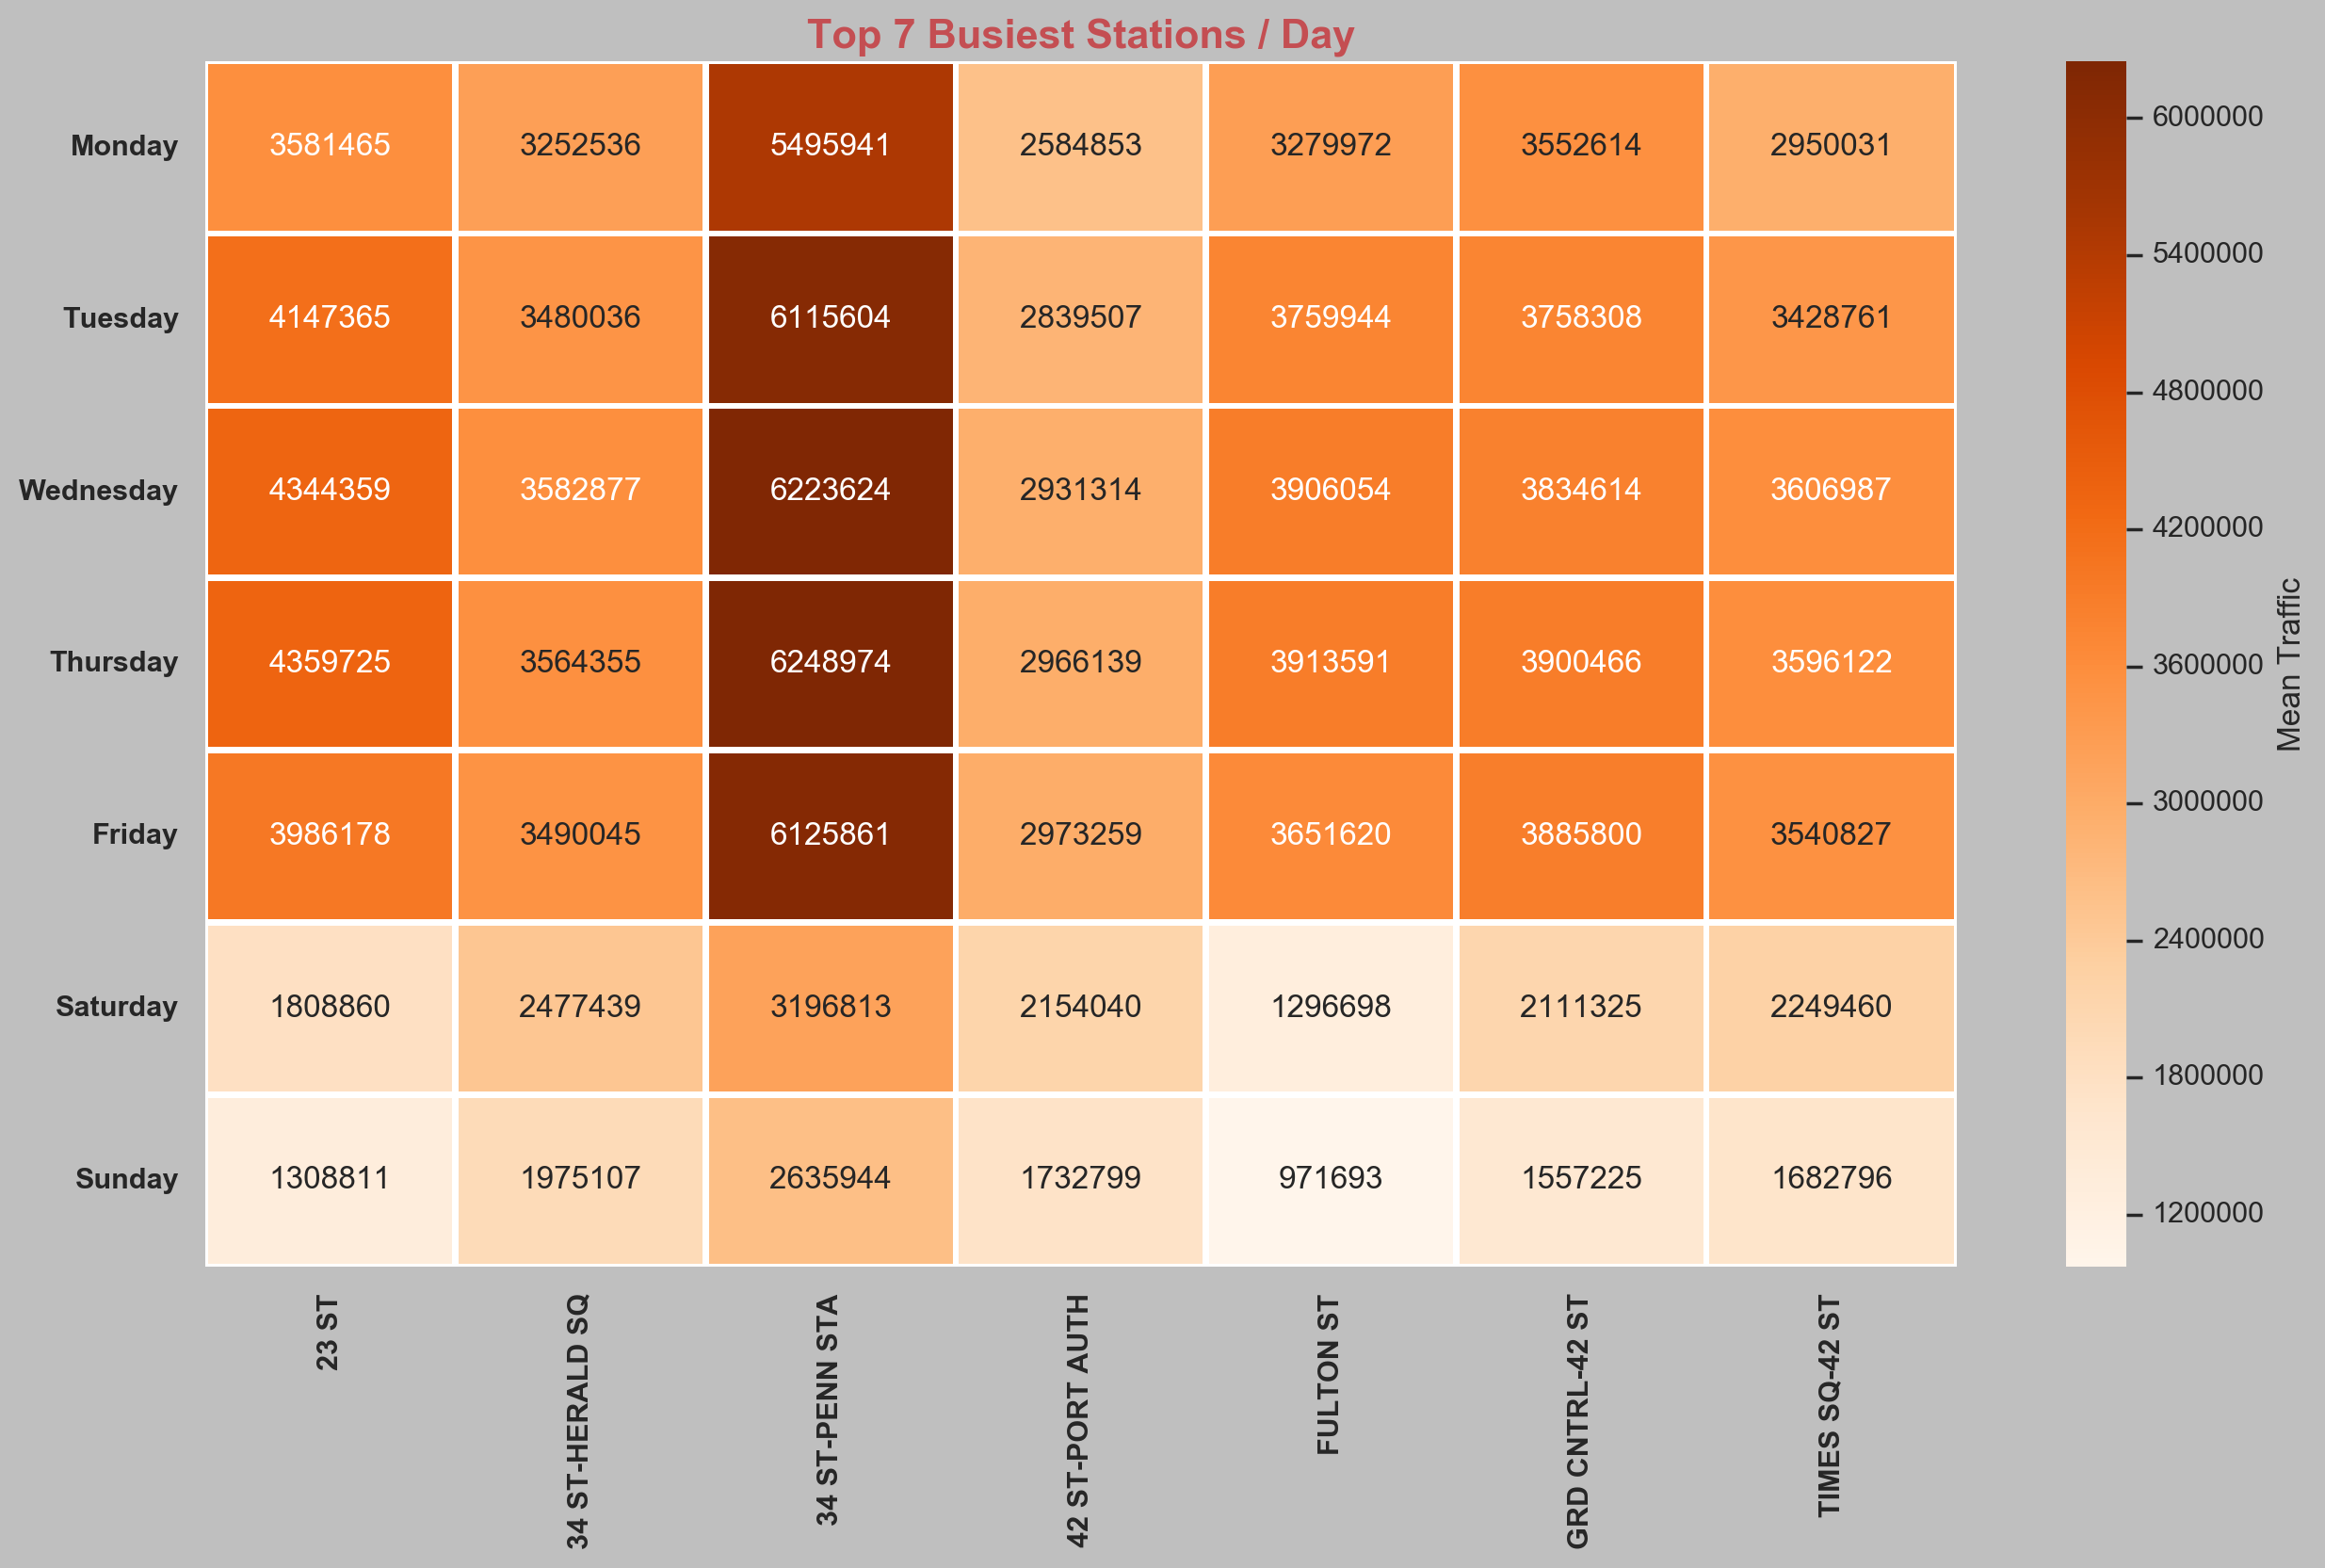

In [48]:
#Heatmap for top7 stations per day

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top7_heatmap,annot=True,fmt="d", linewidths=2, cmap="Oranges",cbar_kws={'label': 'Mean Traffic'})
plt.style.use('seaborn-talk')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0)
plt.xticks(weight="bold",rotation=90)
plt.title("Top 7 Busiest Stations / Day",weight="bold",c="r")
plt.savefig('images/04_Top7BusiesStationsPerDayHeatmap.png', dpi=200)
plt.show()

In [111]:
#Calculating busiest time
mta_time = mta.sort_values(["STATION","TURNSTILE","DATETIME"]).reset_index()
mta_time_group = mta_time.groupby(["TURNSTILE"])

mta_time["DIF_ENTRIES"] = mta_time_group["ENTRIES"].transform(pd.Series.diff)
mta_time["DIF_EXITS"] = mta_time_group["EXITS"].transform(pd.Series.diff)

mta_time.head(10)

,index,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS
0,30508,1 AV,H007-R248-00-00-00,01/01/2019,03:00:00,2019-01-01 03:00:00,Tuesday,14276525,16005314,NaN,NaN
1,30509,1 AV,H007-R248-00-00-00,01/01/2019,07:00:00,2019-01-01 07:00:00,Tuesday,14276565,16005531,40.0,217.0
2,30510,1 AV,H007-R248-00-00-00,01/01/2019,11:00:00,2019-01-01 11:00:00,Tuesday,14276733,16005804,168.0,273.0
3,30511,1 AV,H007-R248-00-00-00,01/01/2019,15:00:00,2019-01-01 15:00:00,Tuesday,14277178,16006393,445.0,589.0
4,30512,1 AV,H007-R248-00-00-00,01/01/2019,19:00:00,2019-01-01 19:00:00,Tuesday,14277679,16007007,501.0,614.0
5,30513,1 AV,H007-R248-00-00-00,01/01/2019,23:00:00,2019-01-01 23:00:00,Tuesday,14277982,16007353,303.0,346.0
6,30514,1 AV,H007-R248-00-00-00,01/02/2019,03:00:00,2019-01-02 03:00:00,Wednesday,14278032,16007445,50.0,92.0
7,30515,1 AV,H007-R248-00-00-00,01/02/2019,07:00:00,2019-01-02 07:00:00,Wednesday,14278106,16007740,74.0,295.0
8,30516,1 AV,H007-R248-00-00-00,01/02/2019,11:00:00,2019-01-02 11:00:00,Wednesday,14279160,16009110,1054.0,1370.0
9,30517,1 AV,H007-R248-00-00-00,01/02/2019,15:00:00,2019-01-02 15:00:00,Wednesday,14279791,16009914,631.0,804.0


In [112]:
#Checking Diff values for entries and exits
print(mta_time["DIF_ENTRIES"].describe())
print(mta_time["DIF_EXITS"].describe())

count    4.389476e+06
mean     2.037309e+03
std      3.939587e+06
min     -2.071639e+09
25%      8.000000e+00
50%      6.700000e+01
75%      2.250000e+02
max      2.088503e+09
Name: DIF_ENTRIES, dtype: float64
count    4.389476e+06
mean     7.239409e+02
std      3.102654e+06
min     -1.897280e+09
25%      7.000000e+00
50%      4.800000e+01
75%      1.560000e+02
max      2.107590e+09
Name: DIF_EXITS, dtype: float64


In [113]:
print("Negative values for DIF_ENTRIES column: ")
print(len(mta_time[mta_time["DIF_ENTRIES"]<0]))
print("Negative values for DIF_EXITS column:")
print(len(mta_time[mta_time["DIF_EXITS"]<0]))

Negative values for DIF_ENTRIES column: 
39327
Negative values for DIF_EXITS column:
31602


In [159]:
mta_time["DIF_ENTRIES"].median()

67.0

In [187]:
mta_time["DIF_ENTRIES"] = mta_time["DIF_ENTRIES"].fillna(0)
mta_time["DIF_EXITS"] = mta_time["DIF_EXITS"].fillna(0)
mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] < 0] = 67
mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] < 0] = 48
mta_time['DIF_ENTRIES'][mta_time['DIF_ENTRIES'] > 663] = 67 
mta_time['DIF_EXITS'][mta_time['DIF_EXITS'] > 540] = 48 

/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/yalinyener/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [188]:
mta_time["DIF_EXITS"].describe()

count    4.394408e+06
mean     8.940953e+01
std      1.144590e+02
min      0.000000e+00
25%      8.000000e+00
50%      4.800000e+01
75%      1.240000e+02
max      5.400000e+02
Name: DIF_EXITS, dtype: float64

In [189]:
mta_time["DIF_ENTRIES"].describe()

count    4.394408e+06
mean     1.220328e+02
std      1.503640e+02
min      0.000000e+00
25%      9.000000e+00
50%      6.700000e+01
75%      1.810000e+02
max      6.630000e+02
Name: DIF_ENTRIES, dtype: float64

In [190]:
mta_time["TRAFFIC"] = mta_time["DIF_ENTRIES"] + mta_time["DIF_EXITS"]
mta_time.head(10)

,index,STATION,TURNSTILE,DATE,TIME,DATETIME,NAMEOFDAY,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
0,30508,1 AV,H007-R248-00-00-00,01/01/2019,03:00:00,2019-01-01 03:00:00,Tuesday,14276525,16005314,0.0,0.0,0.0
1,30509,1 AV,H007-R248-00-00-00,01/01/2019,07:00:00,2019-01-01 07:00:00,Tuesday,14276565,16005531,40.0,217.0,257.0
2,30510,1 AV,H007-R248-00-00-00,01/01/2019,11:00:00,2019-01-01 11:00:00,Tuesday,14276733,16005804,168.0,273.0,441.0
3,30511,1 AV,H007-R248-00-00-00,01/01/2019,15:00:00,2019-01-01 15:00:00,Tuesday,14277178,16006393,445.0,48.0,493.0
4,30512,1 AV,H007-R248-00-00-00,01/01/2019,19:00:00,2019-01-01 19:00:00,Tuesday,14277679,16007007,501.0,48.0,549.0
5,30513,1 AV,H007-R248-00-00-00,01/01/2019,23:00:00,2019-01-01 23:00:00,Tuesday,14277982,16007353,303.0,346.0,649.0
6,30514,1 AV,H007-R248-00-00-00,01/02/2019,03:00:00,2019-01-02 03:00:00,Wednesday,14278032,16007445,50.0,92.0,142.0
7,30515,1 AV,H007-R248-00-00-00,01/02/2019,07:00:00,2019-01-02 07:00:00,Wednesday,14278106,16007740,74.0,295.0,369.0
8,30516,1 AV,H007-R248-00-00-00,01/02/2019,11:00:00,2019-01-02 11:00:00,Wednesday,14279160,16009110,67.0,48.0,115.0
9,30517,1 AV,H007-R248-00-00-00,01/02/2019,15:00:00,2019-01-02 15:00:00,Wednesday,14279791,16009914,631.0,48.0,679.0


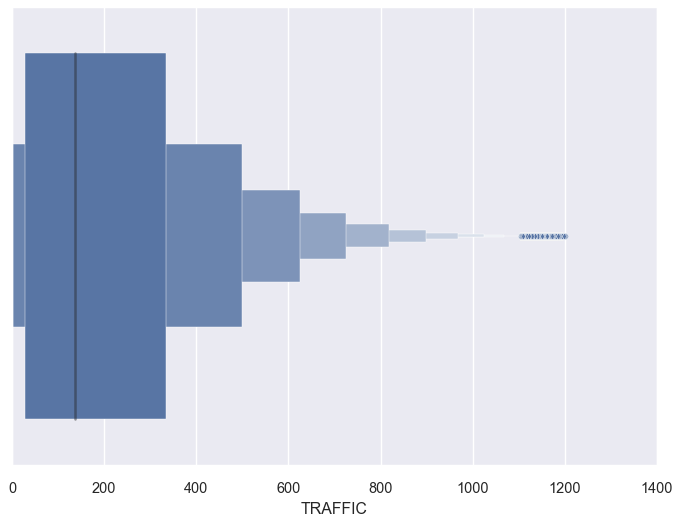

In [191]:
sns.boxenplot(mta_time["TRAFFIC"])

In [192]:
mta_time.groupby(["STATION"]).sum().sort_values("TRAFFIC", ascending=False).head(7)

,index,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
STATION,,,,,,
34 ST-PENN STA,8223702618,3553264755271,3757711248727,13778745.0,10703234.0,24481979.0
23 ST,6165167551,5396339801230,5669192421356,9675497.0,7735802.0,17411299.0
FULTON ST,7729610960,3950882565417,4024736982148,8652135.0,6730559.0,15382694.0
GRD CNTRL-42 ST,9606311001,2220289633343,2117582801802,8005223.0,6679059.0,14684282.0
34 ST-HERALD SQ,3584066328,4307758837019,5402831394188,7247160.0,6840084.0,14087244.0
125 ST,4777077920,4980160629760,2966373052389,7798203.0,6222431.0,14020634.0
42 ST-PORT AUTH,2405035703,7057744704941,5768779360597,8669231.0,5246874.0,13916105.0


In [218]:
#Busiest Time at 34 ST-PENN Station
mta_busiest_time = mta_time[(mta_time['STATION'] == '34 ST-PENN STA')]
mta_busiest_time.groupby(["TIME"]).sum().sort_values("TRAFFIC", ascending=False).head(5)

,index,ENTRIES,EXITS,DIF_ENTRIES,DIF_EXITS,TRAFFIC
TIME,,,,,,
20:00:00,482469054,155726830915,138146120210,1577786.0,1104422.0,2682208.0
16:00:00,483071491,154494646627,136781242299,1479042.0,1136760.0,2615802.0
12:00:00,483520336,155762156092,138149290517,1093259.0,1043462.0,2136721.0
19:00:00,387203514,125300520910,111919484087,1244187.0,818501.0,2062688.0
15:00:00,389039637,125680745007,112005117086,1001481.0,779934.0,1781415.0


In [228]:
#Busiest Time at 34 ST-PENN Station
mta_busiest_day_time = mta_time[(mta_time['STATION'] == '34 ST-PENN STA')]
mta_busiest_day_time.groupby(["NAMEOFDAY","TIME"]).sum().sort_values("TRAFFIC", ascending=False).head(25)

index      ENTRIES        EXITS  DIF_ENTRIES  \
NAMEOFDAY TIME                                                        
Friday    20:00:00  69057680  22468346643  19877196398     239604.0   
          16:00:00  68922455  22467959319  19876696689     239297.0   
Thursday  20:00:00  70062590  22526090281  19987516866     241465.0   
Wednesday 20:00:00  69791579  22507811121  19975131812     242771.0   
Tuesday   20:00:00  70051437  22532045686  19992683542     245436.0   
Monday    20:00:00  70045967  22536457300  20003633699     245625.0   
Thursday  16:00:00  69467838  21241920191  18592038773     229842.0   
Wednesday 16:00:00  70056834  22530576730  19990908660     228583.0   
Tuesday   16:00:00  70103746  22531768863  19992206319     224848.0   
Monday    16:00:00  70098159  22536247400  20003227463     214749.0   
Friday    12:00:00  68974088  22468167310  19876382813     179186.0   
Thursday  12:00:00  70060417  22526361364  19975300685     176357.0   
Wednesday 12:00:00  70000924  22519239405  19980011306     178173.0   
Monday    12:00:00  69961397  22531024261  19999882834     170270.0   
Tuesday   12:00:00  70102822  22531543391  19991942425     171529.0   
Thursday  19:00:00  57610905  18917574358  16890972405     200899.0   
Tuesday   19:00:00  57707418  18917307797  16889959570     196877.0   
Saturday  20:00:00  63366314  20620766462  18307331363     180689.0   
Friday    19:00:00  55294463  17306423245  15414523052     194130.0   
Saturday  16:00:00  64329941  20651055393  18323711552     175609.0   
Wednesday 19:00:00  56388659  17346020128  15460173403     192463.0   
Sunday    20:00:00  70093487  22535313422  20002626530     182196.0   
          16:00:00  70092518  22535118731  20002452843     166114.0   
Monday    19:00:00  51762394  17021514205  15196141088     176757.0   
Friday    15:00:00  55560635  17314255740  15426708314     163621.0   

                    DIF_EXITS   TRAFFIC  
NAMEOFDAY TIME                           
Friday    20:00:00   183751.0  423355.0  
          16:00:00   176836.0  416133.0  
Thursday  20:00:00   170943.0  412408.0  
Wednesday 20:00:00   165085.0  407856.0  
Tuesday   20:00:00   159952.0  405388.0  
Monday    20:00:00   158863.0  404488.0  
Thursday  16:00:00   173687.0  403529.0  
Wednesday 16:00:00   173775.0  402358.0  
Tuesday   16:00:00   172577.0  397425.0  
Monday    16:00:00   164501.0  379250.0  
Friday    12:00:00   164630.0  343816.0  
Thursday  12:00:00   166928.0  343285.0  
Wednesday 12:00:00   164631.0  342804.0  
Monday    12:00:00   163780.0  334050.0  
Tuesday   12:00:00   160332.0  331861.0  
Thursday  19:00:00   125827.0  326726.0  
Tuesday   19:00:00   128951.0  325828.0  
Saturday  20:00:00   138150.0  318839.0  
Friday    19:00:00   122181.0  316311.0  
Saturday  16:00:00   137207.0  312816.0  
Wednesday 19:00:00   119977.0  312440.0  
Sunday    20:00:00   127678.0  309874.0  
          16:00:00   138177.0  304291.0  
Monday    19:00:00   112630.0  289387.0  
Friday    15:00:00   120325.0  283946.0

In [267]:
mta_time["TIMEF"]=pd.to_datetime(mta_time["TIME"], format = '%H:%M:%S')
mta_time_grouped=mta_time.groupby(["TIMEF"]).sum().sort_values(by="TRAFFIC", ascending=False)
mta_time_grouped.resample("4H", convention="end")
mta_time_grouped.columns

Index(['index', 'ENTRIES', 'EXITS', 'DIF_ENTRIES', 'DIF_EXITS', 'TRAFFIC'], dtype='object')